In [2]:
import numpy as np # arithmatic operations
import pandas as pd # to create dataframes and import csv etc
import os
import seaborn as sns
import matplotlib.pyplot as plt #seaborn is based on matplotlib
import scipy.stats as stats
from scipy.stats import shapiro
%matplotlib inline #tells python to display graphs, inplace=true also changes the original datasets. 
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols # For n-way ANOVA
import statsmodels.stats.anova
from statsmodels.stats.anova import anova_lm  # For n-way ANOVA
import warnings
warnings.filterwarnings("ignore")
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

UsageError: unrecognized arguments: #tells python to display graphs, inplace=true also changes the original datasets.


In [3]:
d1=pd.read_csv("Fever.csv")

In [4]:
d1.head()

A  B  Volunteer  Relief
0  1  1          1     2.4
1  1  1          2     2.7
2  1  1          3     2.3
3  1  1          4     2.5
4  1  2          1     4.6

In [5]:
d1.shape

(36, 4)

In [6]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A          36 non-null     int64  
 1   B          36 non-null     int64  
 2   Volunteer  36 non-null     int64  
 3   Relief     36 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 1.2 KB


In [7]:
d1.isnull().sum()

A            0
B            0
Volunteer    0
Relief       0
dtype: int64

## 1.1) State the Null and Alternate Hypothesis for conducting one-way ANOVA for both the variables ‘A’ and ‘B’ individually. [both statement and statistical form like Ho=mu, Ha>mu]

## Approach
 The variables A and B are categorical data. Relief is a measure data that represents the hours of relief when the compound A or B is adminsitered. The Null hypothesis is the status quo or the "No difference" hypothesis. 
 * $H_0$: $\mu$1 $=$ $\mu$2 $=$ $\mu$3  The mean relief hours are equal across all categories of compound A
 * $\mu$1 $\neq$ $\mu$2 $=$ $\mu$3 or $\mu$1 $=$ $\mu$2 $\neq$ $\mu$3 or $\mu$1 $\neq$ $\mu$2 $\neq$ $\mu$3 Atleast one of the mean relief hours are not equal across all categories of compound A
 
 
 
 * $H_0$: $\mu$1 $=$ $\mu$2 $=$ $\mu$3  The mean relief hours are equal across all categories of compound B
 * $H_A$: $\mu$1 $\neq$ $\mu$2 $=$ $\mu$3 or $\mu$1 $=$ $\mu$2 $\neq$ $\mu$3 or $\mu$1 $\neq$ $\mu$2 $\neq$ $\mu$3  Atleast one of the mean relief hours are not equal across all categories of compound B

## 1.2) Perform one-way ANOVA for variable ‘A’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.



## Approach for 1.2 and 1.3

To perform an one-way ANOVA, we should check for few conditions like normality, randomization of events, if samples are independent and equality of variance.To check for the Normality and Equality of Variance, we can use Shapiro and Levene's test. The H0 for the test is " The sample is normal/shows equality of variance". For a significance level of 0.05, the p value if lesser than 0.05, then we reject the null hypothesis. In such a case, the sample does not satisfy the basic assumptions for a parametric test like one-way Anova,we can still go ahead and check One way ANOVA if sample size is big.  we also plot box plot or a distplot to see the distribution and a scatter plot to check the homoscedasticity. 

In order to check for Shapiro and Levene's test, We should pivot the column such that Categorical levels appear as column headings, convert them to array and pass it for Shapiro and Levene for each of the compund analysis namely A and B. 

* $H_0$: $\mu$1 $=$ $\mu$2 $=$ $\mu$3  The mean relief hours are equal across all categories of compound A
* $H_A$: $\mu$1 $\neq$ $\mu$2 $=$ $\mu$3 or $\mu$1 $=$ $\mu$2 $\neq$ $\mu$3 or $\mu$1 $\neq$ $\mu$2 $\neq$ $\mu$3  Atleast one of the mean relief hours are not equal across all categories of compound A

C:\Users\SWATHI SUKUMAR\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


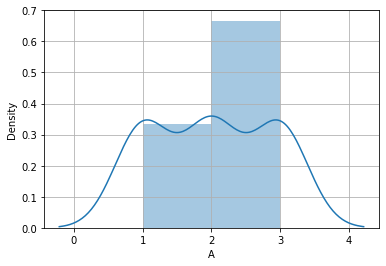

In [8]:
sns.distplot(d1["A"])
plt.grid()
plt.show()

Conclusion: 


Since the data is symetrically distibuted but it doesnt not give enough evidence on normality and equality of variance. 

In [9]:
d2=d1[["A","Relief"]] 
d2=d2.pivot(columns=["A"])
d2

Relief           
A       1    2     3
0     2.4  NaN   NaN
1     2.7  NaN   NaN
2     2.3  NaN   NaN
3     2.5  NaN   NaN
4     4.6  NaN   NaN
5     4.2  NaN   NaN
6     4.9  NaN   NaN
7     4.7  NaN   NaN
8     4.8  NaN   NaN
9     4.5  NaN   NaN
10    4.4  NaN   NaN
11    4.6  NaN   NaN
12    NaN  5.8   NaN
13    NaN  5.2   NaN
14    NaN  5.5   NaN
15    NaN  5.3   NaN
16    NaN  8.9   NaN
17    NaN  9.1   NaN
18    NaN  8.7   NaN
19    NaN  9.0   NaN
20    NaN  9.1   NaN
21    NaN  9.3   NaN
22    NaN  8.7   NaN
23    NaN  9.4   NaN
24    NaN  NaN   6.1
25    NaN  NaN   5.7
26    NaN  NaN   5.9
27    NaN  NaN   6.2
28    NaN  NaN   9.9
29    NaN  NaN  10.5
30    NaN  NaN  10.6
31    NaN  NaN  10.1
32    NaN  NaN  13.5
33    NaN  NaN  13.0
34    NaN  NaN  13.3
35    NaN  NaN  13.2

In [10]:
d2.columns

MultiIndex([('Relief', 1),
            ('Relief', 2),
            ('Relief', 3)],
           names=[None, 'A'])

In [12]:
for i in range(3):
    n=i+1
    d3=pd.DataFrame(d2,columns=[("Relief",n)])
    d3=d3.dropna()
    d3=d3.to_numpy()
    t,p= stats.shapiro(d3)
    print("The values of Shapiro tests are",t,p)

The values of Shapiro tests are 0.7686296701431274 0.004211828112602234
The values of Shapiro tests are 0.728706955909729 0.001616060733795166
The values of Shapiro tests are 0.847996175289154 0.03468279168009758


Since the p value are all less than 0.05, we can reject the null hypotheses that the sample is not normally distributed. 

In [13]:
d6=[]
for i in range(3):
    n=i+1
    d5=pd.DataFrame(d2,columns=[("Relief",n)])
    d5=d5.dropna()
    d5=np.ravel(d5)
    d6.append(d5)
d6

[array([2.4, 2.7, 2.3, 2.5, 4.6, 4.2, 4.9, 4.7, 4.8, 4.5, 4.4, 4.6]),
 array([5.8, 5.2, 5.5, 5.3, 8.9, 9.1, 8.7, 9. , 9.1, 9.3, 8.7, 9.4]),
 array([ 6.1,  5.7,  5.9,  6.2,  9.9, 10.5, 10.6, 10.1, 13.5, 13. , 13.3,
        13.2])]

In [14]:
samp1=d6[0]
samp2=d6[1]
samp3=d6[2]

In [15]:
stats.levene(samp1,samp2,samp3)

LeveneResult(statistic=4.511350350740447, pvalue=0.018535088623493387)

Since the p value are all less than 0.05, we can reject the null hypotheses that the sample is not of equal variances.

In [16]:
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols # For n-way ANOVA
import statsmodels.stats.anova
from statsmodels.stats.anova import anova_lm  # For n-way ANOVA

In [17]:
formula = 'Relief ~ C(A)'
model = ols(formula, d1).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq     mean_sq          F        PR(>F)
C(A)       2.0  220.02  110.010000  23.465387  4.578242e-07
Residual  33.0  154.71    4.688182        NaN           NaN


## Conclusion
Since the p value is is very low compared to 0.05 significance level. We can conclude that the mean relief hours are not same across all levels of of the compund A.We reject Null hypotheses H0 

## 1.3) Perform one-way ANOVA for variable ‘B’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

* $H_0$: $\mu$1 $=$ $\mu$2 $=$ $\mu$3  The mean relief hours are equal across all categories of compound B
* $H_A$: $\mu$1 $\neq$ $\mu$2 $=$ $\mu$3 or $\mu$1 $=$ $\mu$2 $\neq$ $\mu$3 or $\mu$1 $\neq$ $\mu$2 $\neq$ $\mu$3 Atleast one of the mean relief hours are not equal across all categories of compound B

C:\Users\SWATHI SUKUMAR\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


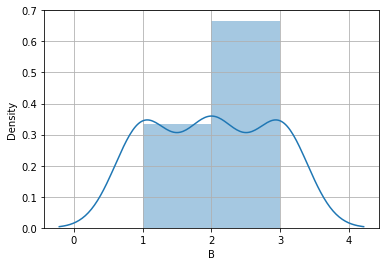

In [20]:
sns.distplot(d1["B"])
plt.grid()
plt.show()

In [21]:
d13=d1[["B","Relief"]] 
d13=d13.pivot(columns=["B"])
d13

Relief            
B       1     2     3
0     2.4   NaN   NaN
1     2.7   NaN   NaN
2     2.3   NaN   NaN
3     2.5   NaN   NaN
4     NaN   4.6   NaN
5     NaN   4.2   NaN
6     NaN   4.9   NaN
7     NaN   4.7   NaN
8     NaN   NaN   4.8
9     NaN   NaN   4.5
10    NaN   NaN   4.4
11    NaN   NaN   4.6
12    5.8   NaN   NaN
13    5.2   NaN   NaN
14    5.5   NaN   NaN
15    5.3   NaN   NaN
16    NaN   8.9   NaN
17    NaN   9.1   NaN
18    NaN   8.7   NaN
19    NaN   9.0   NaN
20    NaN   NaN   9.1
21    NaN   NaN   9.3
22    NaN   NaN   8.7
23    NaN   NaN   9.4
24    6.1   NaN   NaN
25    5.7   NaN   NaN
26    5.9   NaN   NaN
27    6.2   NaN   NaN
28    NaN   9.9   NaN
29    NaN  10.5   NaN
30    NaN  10.6   NaN
31    NaN  10.1   NaN
32    NaN   NaN  13.5
33    NaN   NaN  13.0
34    NaN   NaN  13.3
35    NaN   NaN  13.2

In [22]:
d13.columns

MultiIndex([('Relief', 1),
            ('Relief', 2),
            ('Relief', 3)],
           names=[None, 'B'])

In [23]:
for i in range(3):
    n=i+1
    d131=pd.DataFrame(d13,columns=[("Relief",n)])
    d131=d131.dropna()
    d131=d131.to_numpy()
    t,p= stats.shapiro(d131)
    print("The values of Shapiro tests are",t,p)

The values of Shapiro tests are 0.7656338810920715 0.003910908009856939
The values of Shapiro tests are 0.8065383434295654 0.01112875435501337
The values of Shapiro tests are 0.8446834087371826 0.031581711024045944


Since the p value are all less than 0.05, we can reject the null hypotheses.The sample is not normally distributed. 

In [24]:
d26=[]
for i in range(3):
    n=i+1
    d25=pd.DataFrame(d13,columns=[("Relief",n)])
    d25=d25.dropna()
    d25=np.ravel(d25)
    d26.append(d25)
d26

[array([2.4, 2.7, 2.3, 2.5, 5.8, 5.2, 5.5, 5.3, 6.1, 5.7, 5.9, 6.2]),
 array([ 4.6,  4.2,  4.9,  4.7,  8.9,  9.1,  8.7,  9. ,  9.9, 10.5, 10.6,
        10.1]),
 array([ 4.8,  4.5,  4.4,  4.6,  9.1,  9.3,  8.7,  9.4, 13.5, 13. , 13.3,
        13.2])]

In [25]:
samp1=d26[0]
samp2=d26[1]
samp3=d26[2]

In [26]:
stats.levene(samp1,samp2,samp3)

LeveneResult(statistic=2.941356517208818, pvalue=0.06675699295483081)

Since the p value is greater than 0.05, we cannot reject the null hypotheses.The sample has an equality of variance.

In [27]:
formula = 'Relief ~ C(B)'
model = ols(formula, d1).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq    mean_sq         F   PR(>F)
C(B)       2.0  123.66  61.830000  8.126777  0.00135
Residual  33.0  251.07   7.608182       NaN      NaN


## Conclusion
Since the p value is is very low compared to 0.05 significance level. We can conclude that the mean relief hours are not same across all levels of of the compund B.We reject Null hypotheses H0 

## 1.4) Analyse the effects of one variable on another with the help of an interaction plot.What is the interaction between the two treatments?


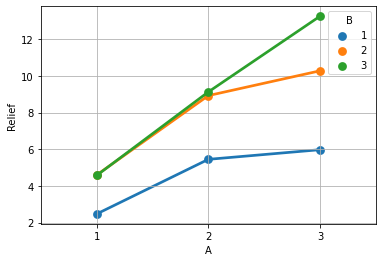

In [28]:
sns.pointplot(x = 'A', y = 'Relief',hue="B", data=d1, ci= None)
plt.grid()
plt.show()

## Conclusion
The Relief hours for levels 1 2 and 3 of compound A has lower relief levels for 1 level of compund B. The levels 2 and 3 of category B has almost same relief hours when interacted with the levels 1 and 2 of compund A, and have higher relief hours for 3 of compund A. However mere plots cannot justify the interaction, we need to prove this statistically to be sure. 

## 1.5) Perform a two-way ANOVA based on the different ingredients (variable ‘A’ & ‘B’ along with their interaction 'A*B') with the variable 'Relief' and state your results.

## Approach

Since we are checking for an interaction and also the effect of both the variables on Relief hours, we are using 2 way ANOVA. 

* $H_0$: There is  interaction between A and B categories
* $H_A$: There is no interaction between A and B categories

In [29]:
formula = 'Relief ~ C(A) + C(B)'
model = ols(formula, d1).fit()
aov_table = anova_lm(model,typ=2)
print(aov_table)

          sum_sq    df           F        PR(>F)
C(A)      220.02   2.0  109.832850  8.514029e-15
C(B)      123.66   2.0   61.730435  1.546749e-11
Residual   31.05  31.0         NaN           NaN


In [30]:
#Interaction effect
formula = 'Relief ~ C(A) + C(B)+ C(A):C(B)'
model = ols(formula, d1).fit()
aov_table = anova_lm(model,typ=2)
print(aov_table)

            sum_sq    df            F        PR(>F)
C(A)       220.020   2.0  1827.858462  1.514043e-29
C(B)       123.660   2.0  1027.329231  3.348751e-26
C(A):C(B)   29.425   4.0   122.226923  6.972083e-17
Residual     1.625  27.0          NaN           NaN


## Conclusion
As p values for factors A and B are very less compared to significance level of 0.05, We can reject the null hypothesis. They do not have an effect on the Relief hours.
The interaction p value us also very less and hence there is no interaction effect on Relief varibale. 

## 1.6) Mention the business implications of performing ANOVA for this particular case study.

We have sample of over 30 observations. The samples involve categorical variables and their effect on the relief hours. This data set is for a sample and not the entire population and is captured through randomization. ANOVA will help us understand the effect of categorical levels of each compound on Relief hours and the interaction effect of these variables on the Relief hours. Relief variable is a dependent variable, while the compounds with different levels are independent variables. ANOVA is used to compare the means between different levels within an independent variable and between the groups of variables. 

* Conclusions :

The mean relief hours for categories across compound A and B are not the same. The interaction of compound A and B did not have an effect on the Relief hours. Hence we were able to independently state the effect of compound A and B on the Releif hours along with their interaction through ANOVA one way test and ANOVA two way tests by comparing the p values to the significance values.

## 2.1) Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. The inferences drawn from this should be properly documented.

## APPROACH
As a part of EDA, we will first load the data, find out data types to find the quantitative and qualitative variables. 
we then perfrom Descriptive analysis. Measure of central tendency is estimated using mean mode and median. This gives an idea
about the concentration of data around the centre. 
Measure of disperation is to see the variablity or spread of data. This is estimated by measuring Variance, standard deviation and range. The five number summary helps us to find the center of spread and shape of data. Skeweness gives an idea about the shape of the data. 

We then do a univariate analysis on each of the column to understand the distribution of data. 
As a part of the bivariate analysis, Covariance and correlation are calcualted. This will tell us how each variable is related to each other. Presence of correlation is important for PCA. 

As a part of data preprocessing, we convert the categorical variables using encoding methods to quantitvely anlayse them.In our case, there are no categorical variables so encoding is not done for this example.
The data is normalised. The transformation techniques are used to remove outliers or duplicates or fill the missing values. 
The preprocessed data is then subjected to PCA. PCA will give us the components 
that best represents the different variables of data. 

In [31]:
data=pd.read_csv("Education+-+Post+12th+Standard.csv")

In [32]:
data.head(5)

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   
3          510           63     12960        5450    450       875   92   
4          249          869      7560        4120    800      1500   76   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        78       18.1           12    7041         60  
1        30       12.2           16   10527         56  
2        66       12.9           30    8735         54  
3        97        7.7           37   19016         59  
4        72       11.9            2   10922         15

In [33]:
data.dtypes

Names           object
Apps             int64
Accept           int64
Enroll           int64
Top10perc        int64
Top25perc        int64
F.Undergrad      int64
P.Undergrad      int64
Outstate         int64
Room.Board       int64
Books            int64
Personal         int64
PhD              int64
Terminal         int64
S.F.Ratio      float64
perc.alumni      int64
Expend           int64
Grad.Rate        int64
dtype: object

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [35]:
data.columns

Index(['Names', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')

In [36]:
#checking for null data
data.isnull().sum()

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [37]:
# Check for duplicate data
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

data[dups]


Number of duplicate rows = 0


Empty DataFrame
Columns: [Names, Apps, Accept, Enroll, Top10perc, Top25perc, F.Undergrad, P.Undergrad, Outstate, Room.Board, Books, Personal, PhD, Terminal, S.F.Ratio, perc.alumni, Expend, Grad.Rate]
Index: []

## Univariate Analysis

In [38]:
data.describe()

Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F.Undergrad   P.Undergrad      Outstate   Room.Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      1.000000   2340.000000  1780.000000    96.000000   
25%      992.000000     95.000000   7320.000000  3597.000000   470.000000   
50%     1707.000000    353.000000   9990.000000  4200.000000   500.000000   
75%     4005.000000    967.000000  12925.000000  5050.000000   600.000000   
max    31643.000000  21836.000000  21700.000000  8124.000000  2340.000000   

          Personal         PhD    Terminal   S.F.Ratio  perc.alumni  \
count   777.000000  777.000000  777.000000  777.000000   777.000000   
mean   1340.642214   72.660232   79.702703   14.089704    22.743887   
std     677.071454   16.328155   14.722359    3.958349    12.391801   
min     250.000000    8.000000   24.000000    2.500000     0.000000   
25%     850.000000   62.000000   71.000000   11.500000    13.000000   
50%    1200.000000   75.000000   82.000000   13.600000    21.000000   
75%    1700.000000   85.000000   92.000000   16.500000    31.000000   
max    6800.000000  103.000000  100.000000   39.800000    64.000000   

             Expend  Grad.Rate  
count    777.000000  777.00000  
mean    9660.171171   65.46332  
std     5221.768440   17.17771  
min     3186.000000   10.00000  
25%     6751.000000   53.00000  
50%     8377.000000   65.00000  
75%    10830.000000   78.00000  
max    56233.000000  118.00000

In [39]:
q1=data.quantile(q=0.25)
q3=data.quantile(q=0.75)
IQR=q3-q1
d1=data
d4=((d1 < (q1 - 1.5 * IQR)) | (d1 > (q3 + 1.5 * IQR))).sum()
d4

Accept         73
Apps           70
Books          46
Enroll         79
Expend         48
F.Undergrad    97
Grad.Rate       4
Names           0
Outstate        1
P.Undergrad    67
Personal       20
PhD             8
Room.Board      7
S.F.Ratio      12
Terminal        8
Top10perc      39
Top25perc       0
perc.alumni     5
dtype: int64

In [40]:
(data.std()/data.mean())*100

Apps           128.936302
Accept         121.414140
Enroll         119.129280
Top10perc       64.010476
Top25perc       35.494561
F.Undergrad    131.095730
P.Undergrad    178.000048
Outstate        38.532171
Room.Board      25.167866
Books           30.052982
Personal        50.503516
PhD             22.471928
Terminal        18.471593
S.F.Ratio       28.093913
perc.alumni     54.484098
Expend          54.054616
Grad.Rate       26.240206
dtype: float64

In [41]:
data.std()

Apps           3870.201484
Accept         2451.113971
Enroll          929.176190
Top10perc        17.640364
Top25perc        19.804778
F.Undergrad    4850.420531
P.Undergrad    1522.431887
Outstate       4023.016484
Room.Board     1096.696416
Books           165.105360
Personal        677.071454
PhD              16.328155
Terminal         14.722359
S.F.Ratio         3.958349
perc.alumni      12.391801
Expend         5221.768440
Grad.Rate        17.177710
dtype: float64

In [42]:
data.skew()

Apps           3.723750
Accept         3.417727
Enroll         2.690465
Top10perc      1.413217
Top25perc      0.259340
F.Undergrad    2.610458
P.Undergrad    5.692353
Outstate       0.509278
Room.Board     0.477356
Books          3.485025
Personal       1.742497
PhD           -0.768170
Terminal      -0.816542
S.F.Ratio      0.667435
perc.alumni    0.606891
Expend         3.459322
Grad.Rate     -0.113777
dtype: float64

In [43]:
#range of data

ds=data.drop("Names",axis=1)
ds.max()-ds.min()

Apps           48013.0
Accept         26258.0
Enroll          6357.0
Top10perc         95.0
Top25perc         91.0
F.Undergrad    31504.0
P.Undergrad    21835.0
Outstate       19360.0
Room.Board      6344.0
Books           2244.0
Personal        6550.0
PhD               95.0
Terminal          76.0
S.F.Ratio         37.3
perc.alumni       64.0
Expend         53047.0
Grad.Rate        108.0
dtype: float64

C:\Users\SWATHI SUKUMAR\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\SWATHI SUKUMAR\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


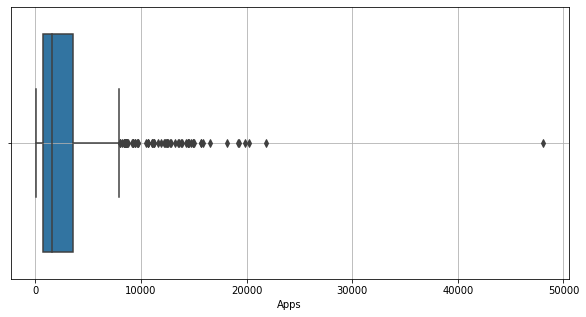

C:\Users\SWATHI SUKUMAR\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\SWATHI SUKUMAR\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


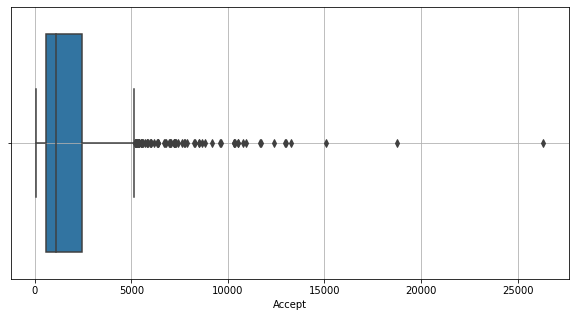

C:\Users\SWATHI SUKUMAR\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\SWATHI SUKUMAR\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


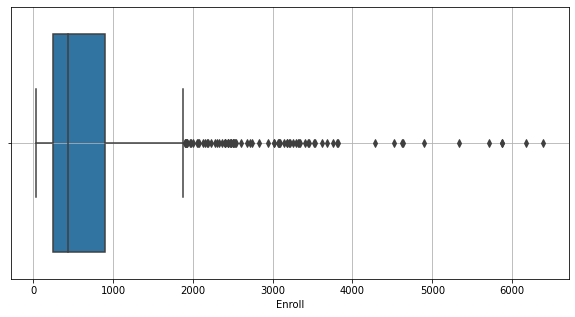

C:\Users\SWATHI SUKUMAR\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\SWATHI SUKUMAR\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


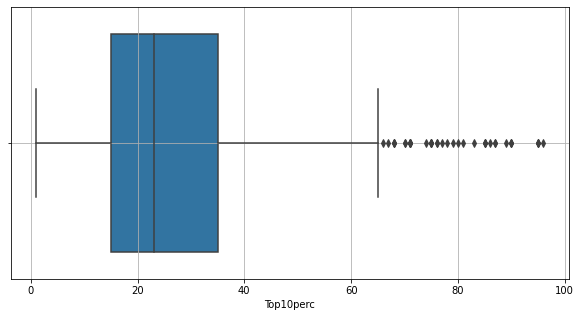

C:\Users\SWATHI SUKUMAR\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\SWATHI SUKUMAR\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


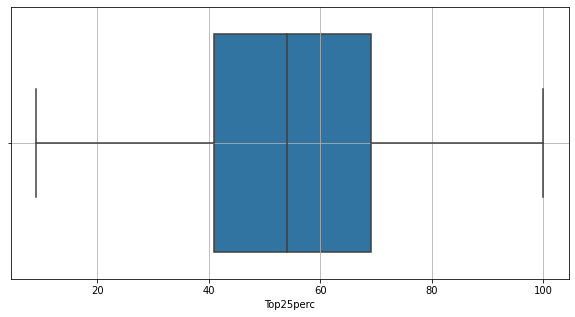

C:\Users\SWATHI SUKUMAR\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\SWATHI SUKUMAR\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


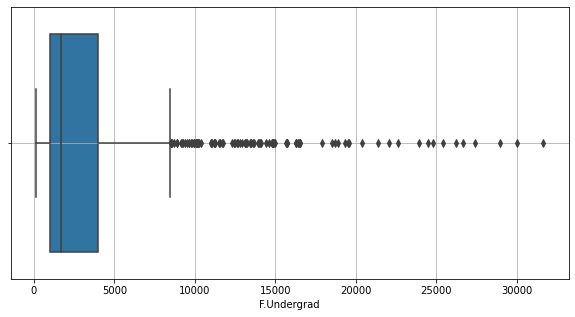

C:\Users\SWATHI SUKUMAR\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\SWATHI SUKUMAR\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


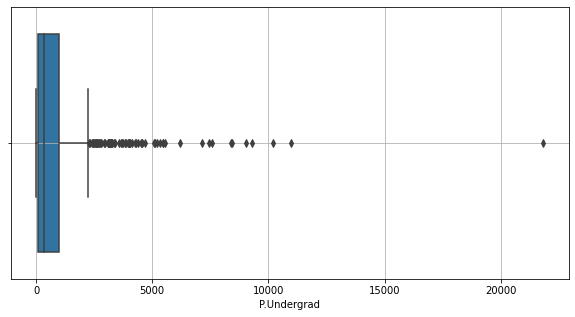

C:\Users\SWATHI SUKUMAR\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\SWATHI SUKUMAR\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


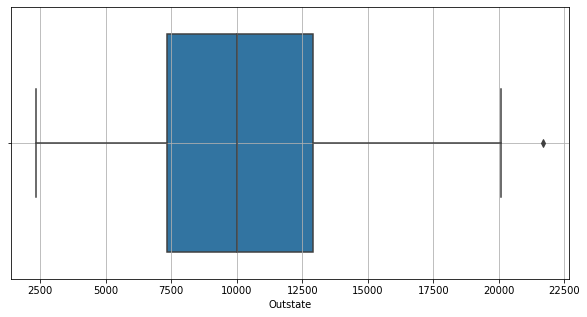

C:\Users\SWATHI SUKUMAR\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\SWATHI SUKUMAR\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


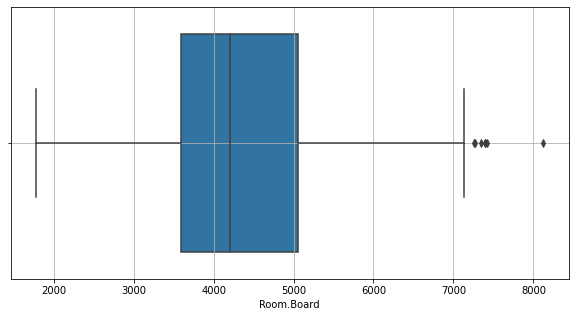

C:\Users\SWATHI SUKUMAR\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\SWATHI SUKUMAR\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


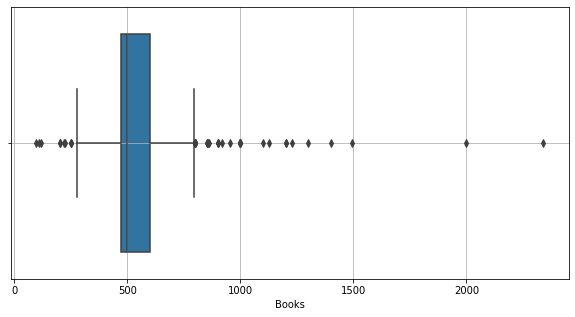

C:\Users\SWATHI SUKUMAR\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\SWATHI SUKUMAR\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


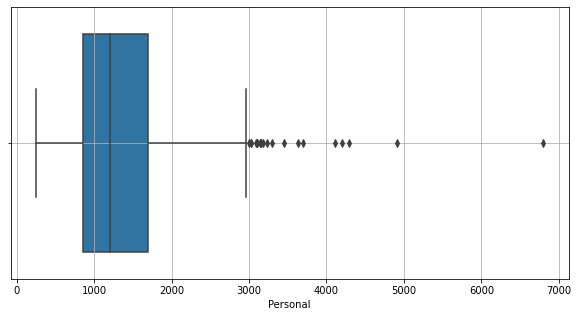

C:\Users\SWATHI SUKUMAR\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\SWATHI SUKUMAR\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


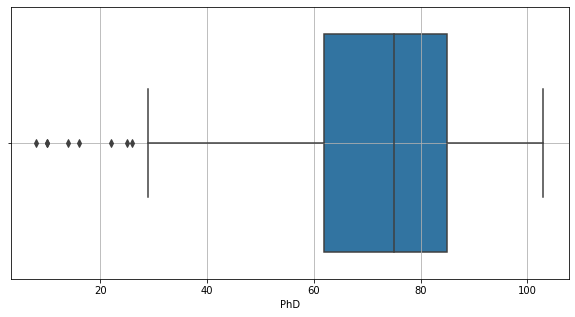

C:\Users\SWATHI SUKUMAR\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\SWATHI SUKUMAR\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


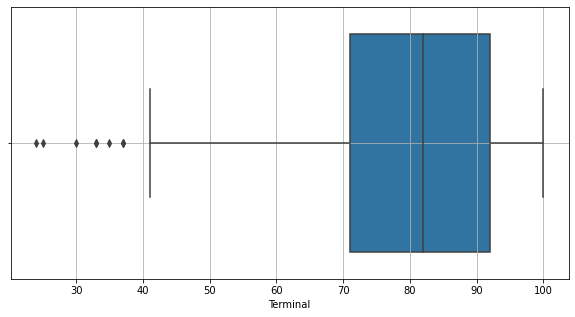

C:\Users\SWATHI SUKUMAR\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\SWATHI SUKUMAR\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


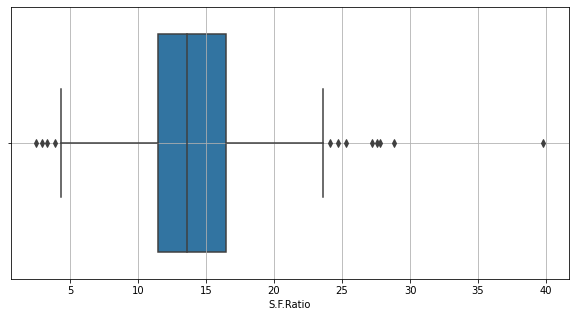

C:\Users\SWATHI SUKUMAR\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\SWATHI SUKUMAR\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


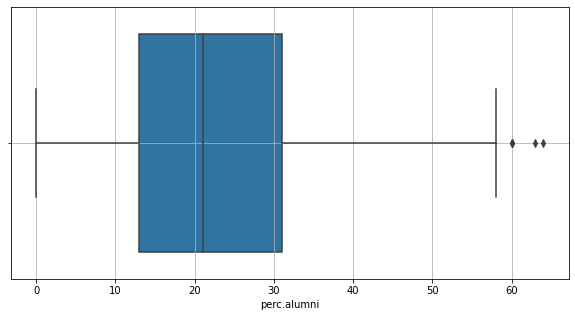

C:\Users\SWATHI SUKUMAR\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\SWATHI SUKUMAR\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


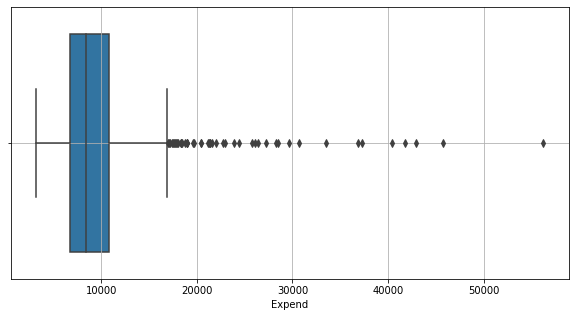

C:\Users\SWATHI SUKUMAR\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\SWATHI SUKUMAR\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


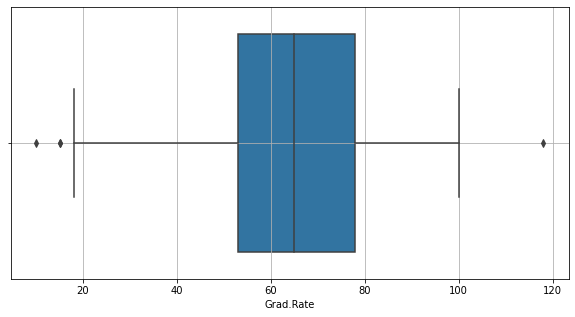

In [44]:
y=data.shape[1]
y=y-1
for i in range(y):
    plt.figure(figsize=(10,5))
    a =sns.boxplot(data.iloc[:,i+1],orient = "v")
    plt.grid()
    plt.show()

In [45]:
data.median()

Apps           1558.0
Accept         1110.0
Enroll          434.0
Top10perc        23.0
Top25perc        54.0
F.Undergrad    1707.0
P.Undergrad     353.0
Outstate       9990.0
Room.Board     4200.0
Books           500.0
Personal       1200.0
PhD              75.0
Terminal         82.0
S.F.Ratio        13.6
perc.alumni      21.0
Expend         8377.0
Grad.Rate        65.0
dtype: float64

C:\Users\SWATHI SUKUMAR\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


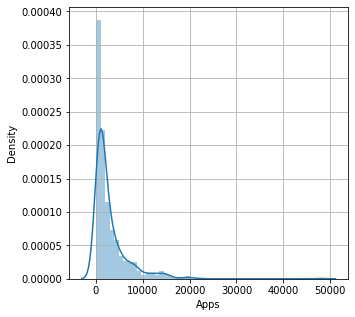

C:\Users\SWATHI SUKUMAR\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


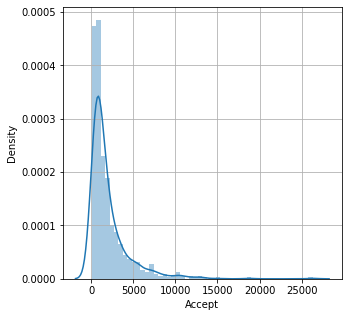

C:\Users\SWATHI SUKUMAR\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


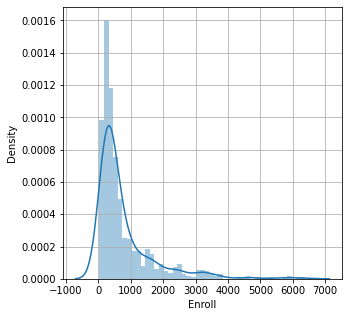

C:\Users\SWATHI SUKUMAR\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


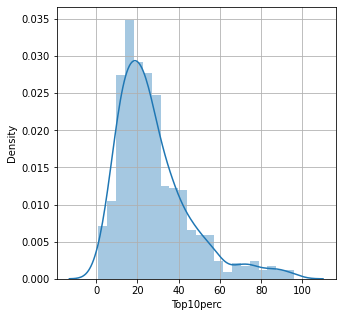

C:\Users\SWATHI SUKUMAR\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


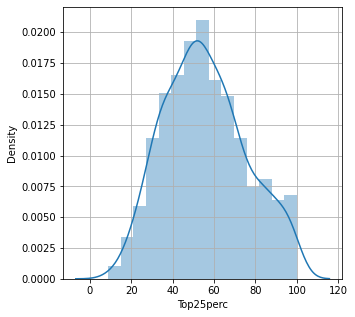

C:\Users\SWATHI SUKUMAR\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


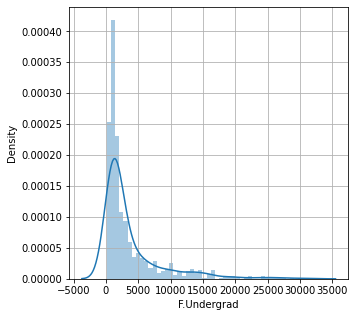

C:\Users\SWATHI SUKUMAR\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


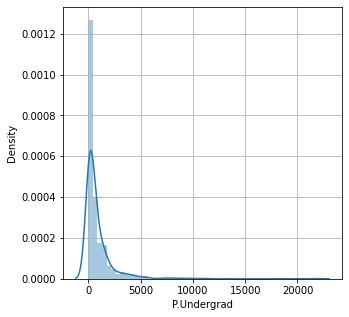

C:\Users\SWATHI SUKUMAR\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


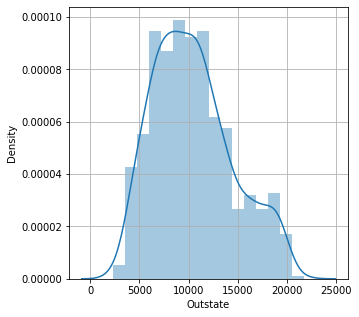

C:\Users\SWATHI SUKUMAR\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


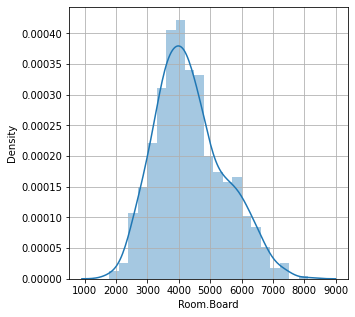

C:\Users\SWATHI SUKUMAR\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


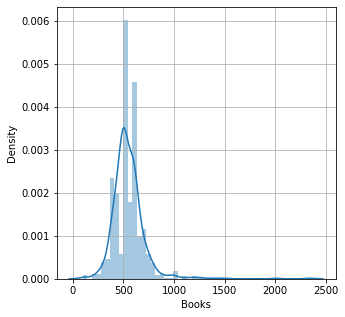

C:\Users\SWATHI SUKUMAR\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


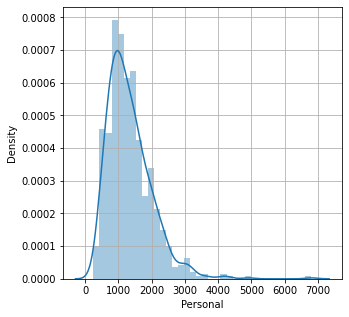

C:\Users\SWATHI SUKUMAR\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


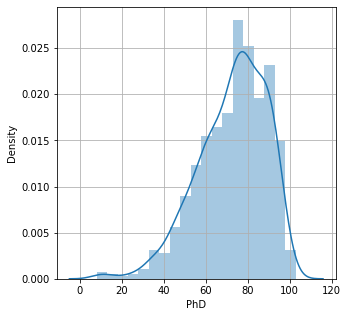

C:\Users\SWATHI SUKUMAR\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


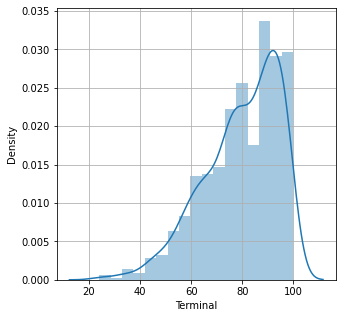

C:\Users\SWATHI SUKUMAR\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


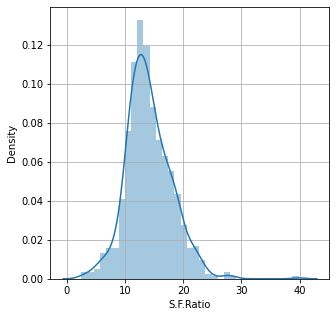

C:\Users\SWATHI SUKUMAR\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


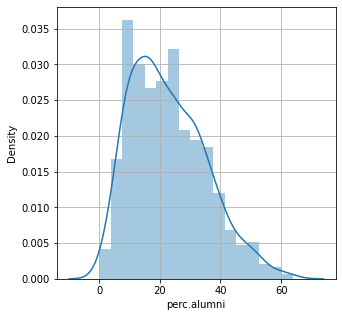

C:\Users\SWATHI SUKUMAR\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


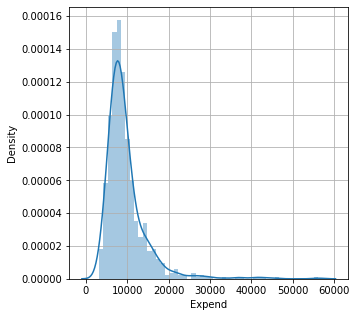

C:\Users\SWATHI SUKUMAR\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


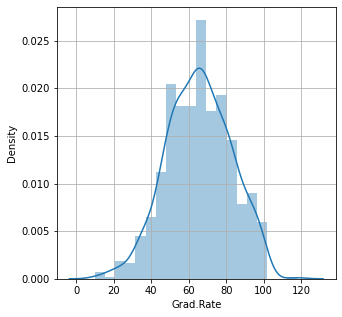

In [46]:
y=data.shape[1]
y=y-1
for i in range(y):
    plt.figure(figsize=(5,5))
    a =sns.distplot(data.iloc[:,i+1])
    plt.grid()
    plt.show()

In [47]:
data.columns

Index(['Names', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')

## Observation from Univariate analysis: 

The data does not contain null values or missing values or duplicates. Top 25 percent is the only column of data that does not contain outliers. All the other columns contain outliers. The coefficient of variation is high for most variables indicating an inconsistency in the data. The skewness also indicates that most of the columns are rigth skewed and few are left skewed. The range values are very high indicating the spread of the data to be wide with presence of outliers and mismatch in the scale of data.  
Treating Outliers and scaling the data is very crucial. 

## Bi variate analysis

In [46]:
corr=data.corr(method='pearson')
corr

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F.Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P.Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room.Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.390697  0.355758  0.331469   0.531828   0.545862     0.318337   
Terminal     0.369491  0.337583  0.308274   0.491135   0.524749     0.300019   
S.F.Ratio    0.095633  0.176229  0.237271  -0.384875  -0.294629     0.279703   
perc.alumni -0.090226 -0.159990 -0.180794   0.455485   0.417864    -0.229462   
Expend       0.259592  0.124717  0.064169   0.660913   0.527447     0.018652   
Grad.Rate    0.146755  0.067313 -0.022341   0.494989   0.477281    -0.078773   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.398264  0.050159    0.164939  0.132559  0.178731  0.390697   
Accept          0.441271 -0.025755    0.090899  0.113525  0.200989  0.355758   
Enroll          0.513069 -0.155477   -0.040232  0.112711  0.280929  0.331469   
Top10perc      -0.105356  0.562331    0.371480  0.118858 -0.093316  0.531828   
Top25perc      -0.053577  0.489394    0.331490  0.115527 -0.080810  0.545862   
F.Undergrad     0.570512 -0.215742   -0.068890  0.115550  0.317200  0.318337   
P.Undergrad     1.000000 -0.253512   -0.061326  0.081200  0.319882  0.149114   
Outstate       -0.253512  1.000000    0.654256  0.038855 -0.299087  0.382982   
Room.Board     -0.061326  0.654256    1.000000  0.127963 -0.199428  0.329202   
Books           0.081200  0.038855    0.127963  1.000000  0.179295  0.026906   
Personal        0.319882 -0.299087   -0.199428  0.179295  1.000000 -0.010936   
PhD             0.149114  0.382982    0.329202  0.026906 -0.010936  1.000000   
Terminal        0.141904  0.407983    0.374540  0.099955 -0.030613  0.849587   
S.F.Ratio       0.232531 -0.554821   -0.362628 -0.031929  0.136345 -0.130530   
perc.alumni    -0.280792  0.566262    0.272363 -0.040208 -0.285968  0.249009   
Expend         -0.083568  0.672779    0.501739  0.112409 -0.097892  0.432762   
Grad.Rate      -0.257001  0.571290    0.424942  0.001061 -0.269344  0.305038   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.369491   0.095633    -0.090226  0.259592   0.146755  
Accept       0.337583   0.176229    -0.159990  0.124717   0.067313  
Enroll       0.308274   0.237271    -0.180794  0.064169  -0.022341  
Top10perc    0.491135  -0.384875     0.455485  0.660913   0.494989  
Top25perc    0.524749  -0.294629     0.417864  0.527447   0.477281  
F.Undergrad  0.300019   0.279703    -0.229462  0.018652  -0.078773  
P.Undergrad  0.141904   0.232531    -0.280792 -0.083568  -0.257001  
Outstate     0.407983  -0.554821     0.566262  0.672779   0.571290  
Room.Board   0.374540  -0.362628     0.272363  0.501739   0.424942  
Books        0.099955  -0.031929    -0.040208  0.112409   0.001061  
Personal    -0.030613   0.136345    -0.285968 -0.097892  -0.269344  
PhD          0.849587  -0.130530     0.249009  0.432762   0.305038  
Terminal     1.000000  -0.160104     0.267130  0.438799   0.289527  
S.F.Ratio   -0.160104   1.000000    -0.402929 -0.583832  -0.306710  
perc.alumni  0.267130  -0.402929     1.000000  0.417712   0.490898  
Expend       0.438799  -0.58383

<AxesSubplot:>

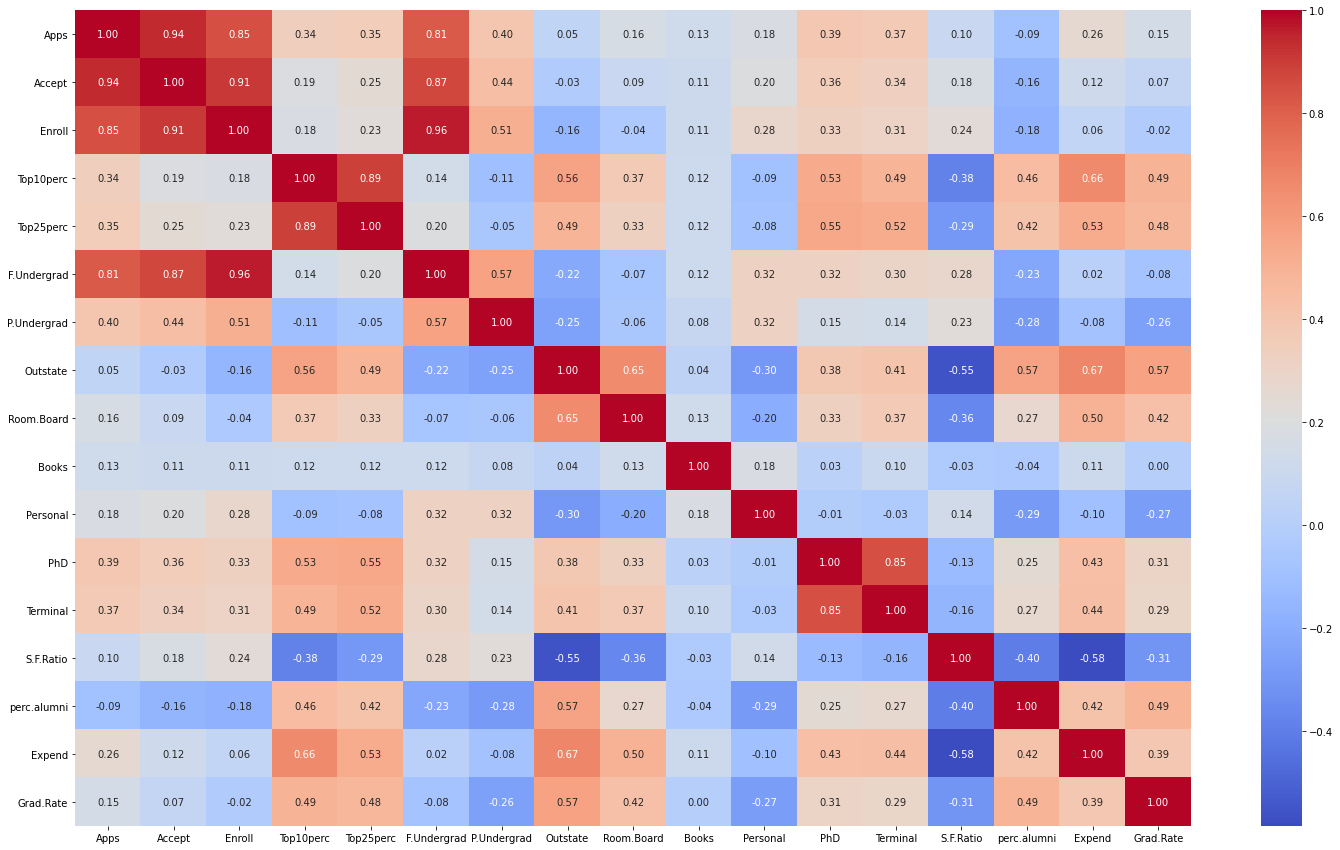

In [47]:
plt.subplots(figsize=(25,15))
sns.heatmap(data.corr(), annot=True,fmt='.2f',cmap='coolwarm')  # plot the correlation coefficients as a heatmap

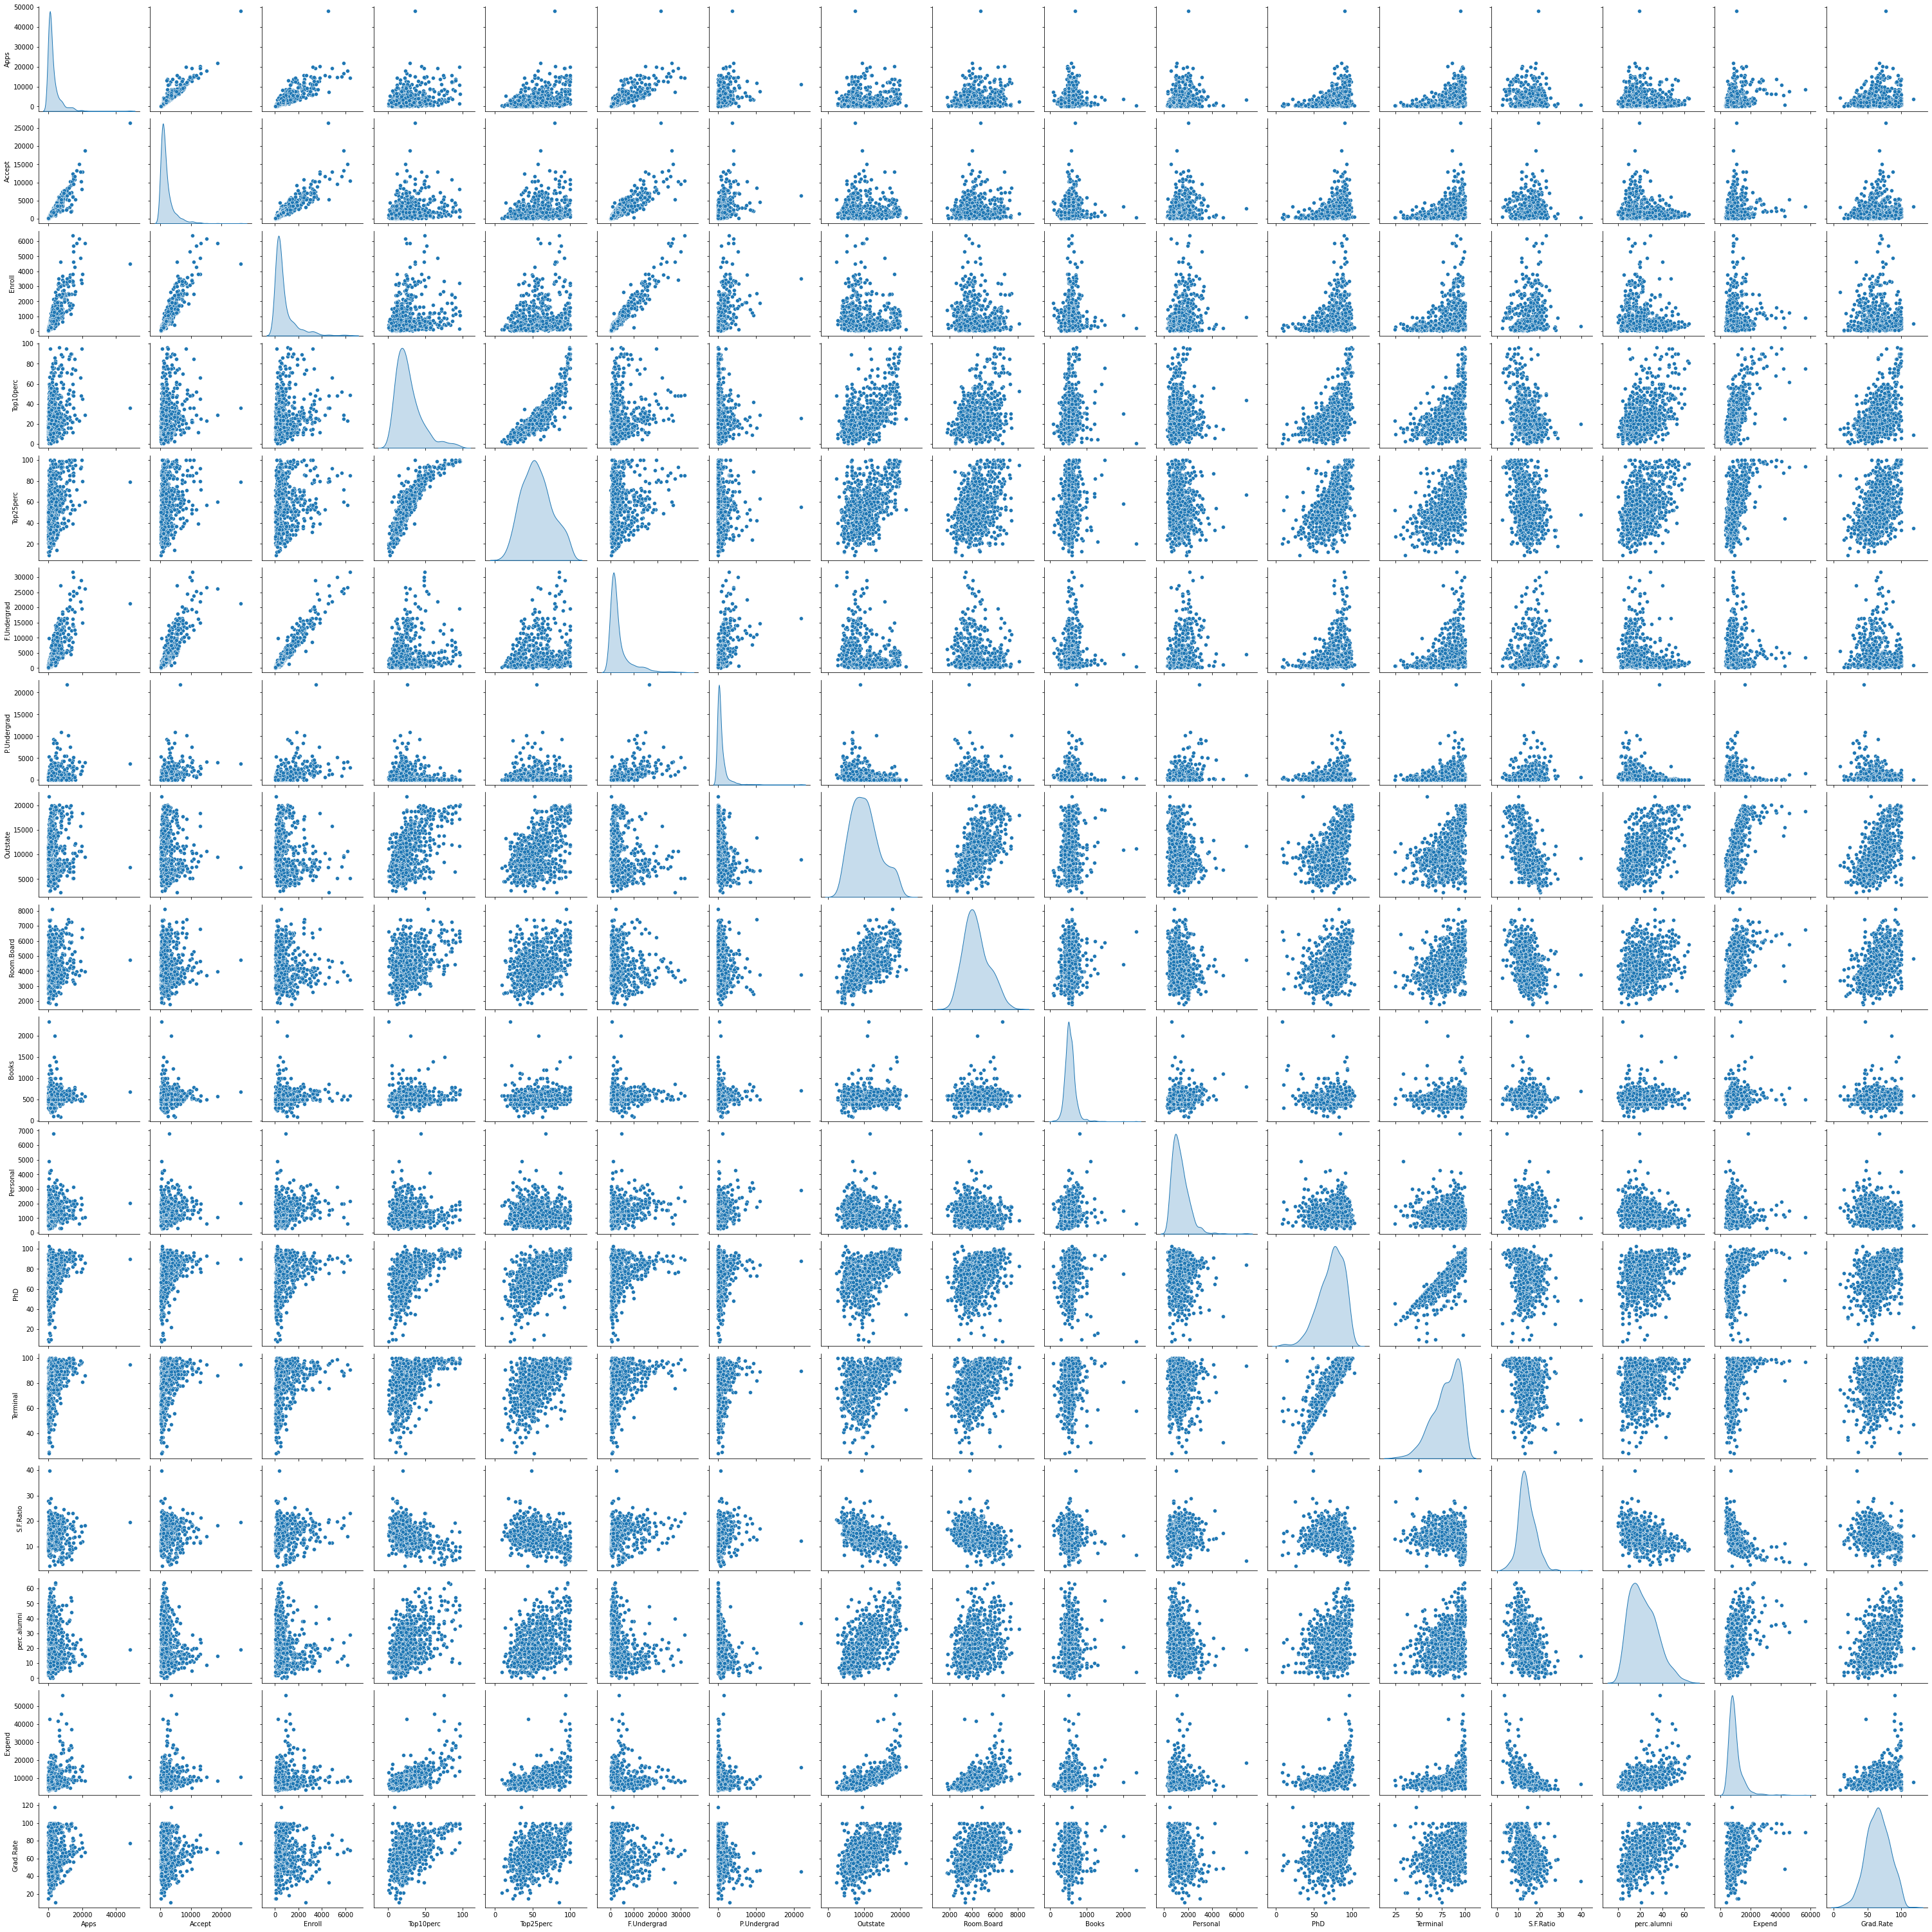

In [48]:
#pair plots
df1=data.drop("Names",axis=1)
sns.pairplot(df1,diag_kind='kde')

## Observation from Bi variate analysis: 

There are few variables that show very strong correlation of above or equal to 0.8.
Number of Applications received is associated to number accepted and number enrolled. Number of fulltime students are related to application, accepted and enrolled numbers. Top 10 percent and Top 25 percentage are related. Percentage of faculties with Phd and Percentage of faculties with terminal degrees are associated. 


## 2.2) Scale the variables and write the inference for using the type of scaling function for this case study.

## Approach

Based on our previous observations,we observed that our spread of the data is very wide and skewed.Hence we need an appropriate transformation or scaler. SInce all data points are not of the same scale. we need to scale the data and hence I use the standard scaler to scale and standardize the data.

In [48]:
data1=data.drop("Names",axis=1)

In [49]:
#We remove the outliers for all the columns by replacing the higher values with upper range and lower with lower range
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [50]:
for i in data1.columns:
    lr,ur=remove_outlier(data1[i])
    data1[i]=np.where(data1[i]>ur,ur,data1[i])
    data1[i]=np.where(data1[i]<lr,lr,data1[i])

In [51]:
q1=data1.quantile(q=0.25)
q3=data1.quantile(q=0.75)
IQR=q3-q1
dd1=data1
dd4=((dd1 < (q1 - 1.5 * IQR)) | (dd1 > (q3 + 1.5 * IQR))).sum()
dd4

Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [52]:
#returns the z-scores of every attribute
from scipy.stats import zscore
data_df=data1.apply(zscore)
data_df.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.376493 -0.337830  0.106380  -0.246780  -0.191827    -0.018769   
1 -0.159195  0.116744 -0.260441  -0.696290  -1.353911    -0.093626   
2 -0.472336 -0.426511 -0.569343  -0.310996  -0.292878    -0.703966   
3 -0.889994 -0.917871 -0.918613   2.129202   1.677612    -0.898889   
4 -0.982532 -1.051221 -1.062533  -0.696290  -0.596031    -0.995610   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.166083 -0.746480   -0.968324 -0.776567  1.438500 -0.174045 -0.123239   
1     0.797856  0.457762    1.921680  1.828605  0.289289 -2.745731 -2.785068   
2    -0.777974  0.201488   -0.555466 -1.210762 -0.260691 -1.240354 -0.952900   
3    -0.828267  0.626954    1.004218 -0.776567 -0.736792  1.205884  1.190391   
4     0.297726 -0.716623   -0.216006  2.219381  0.289289  0.202299 -0.538069   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   1.070602    -0.870466 -0.630916  -0.319205  
1  -0.489511    -0.545726  0.396097  -0.552693  
2  -0.304413     0.590864 -0.131845  -0.669437  
3  -1.679429     1.159159  2.287940  -0.377577  
4  -0.568839    -1.682316  0.512468  -2.916759

In [53]:
data_df.max()-data_df.min()

Apps           3.228490
Accept         3.338356
Enroll         3.259268
Top10perc      4.109807
Top25perc      4.597811
F.Undergrad    3.107473
P.Undergrad    3.176808
Outstate       4.725533
Room.Board     4.999707
Books          4.515632
Personal       4.473714
PhD            4.735665
Terminal       4.182874
S.F.Ratio      5.288521
perc.alumni    4.708730
Expend         4.054580
Grad.Rate      5.837200
dtype: float64

In [54]:
data_df.min()

Apps          -1.028801
Accept        -1.099832
Enroll        -1.097636
Top10perc     -1.659526
Top25perc     -2.364419
F.Undergrad   -1.036373
P.Undergrad   -0.914882
Outstate      -2.015414
Room.Board    -2.362866
Books         -2.296251
Personal      -1.762874
PhD           -2.839817
Terminal      -2.785068
S.F.Ratio     -2.657805
perc.alumni   -1.844686
Expend        -1.766640
Grad.Rate     -2.916759
dtype: float64

In [55]:
data_df.max()

Apps           2.199689
Accept         2.238524
Enroll         2.161632
Top10perc      2.450281
Top25perc      2.233391
F.Undergrad    2.071100
P.Undergrad    2.261926
Outstate       2.710119
Room.Board     2.636841
Books          2.219381
Personal       2.710841
PhD            1.895848
Terminal       1.397806
S.F.Ratio      2.630716
perc.alumni    2.864044
Expend         2.287940
Grad.Rate      2.920440
dtype: float64

In [56]:
#range of data

ds=data.drop("Names",axis=1)
ds.max()-ds.min()

Apps           48013.0
Accept         26258.0
Enroll          6357.0
Top10perc         95.0
Top25perc         91.0
F.Undergrad    31504.0
P.Undergrad    21835.0
Outstate       19360.0
Room.Board      6344.0
Books           2244.0
Personal        6550.0
PhD               95.0
Terminal          76.0
S.F.Ratio         37.3
perc.alumni       64.0
Expend         53047.0
Grad.Rate        108.0
dtype: float64

In [57]:
data_df.mean()

Apps           1.234534e-16
Accept         1.340626e-16
Enroll         1.521645e-16
Top10perc     -2.250452e-18
Top25perc     -1.546739e-16
F.Undergrad   -1.911679e-16
P.Undergrad   -9.573352e-17
Outstate      -1.583175e-16
Room.Board    -1.900382e-17
Books         -4.465183e-16
Personal      -9.605501e-17
PhD            4.232636e-16
Terminal       2.460494e-16
S.F.Ratio      3.635016e-16
perc.alumni    5.765444e-17
Expend         1.148802e-16
Grad.Rate     -2.743408e-16
dtype: float64

## Conclusion

We see that the range of the data is of same scale across all columns. The mean of the data is almost zero. Since z score is (X-xbar)/sd, the data is centred around the origin and outliers are removed as scaling such as Z Score uses X bar, which is a mean. Mean values are influenced by Outliers and hence there should not be any extreme values. PCA will now give equal preference to data points since there are no extreme values. Standardization of models is hence efficient. If standardization is not done, PCA might pick up the extreme values and provide us inefficient results.

## 2.3) Comment on the comparison between covariance and the correlation matrix after scaling.

## Correlation and Covariance matrix before scaling 

In [58]:
corr=data1.corr(method='pearson')
corr

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.955307  0.896883   0.321342   0.364491     0.861002   
Accept       0.955307  1.000000  0.935277   0.223298   0.273681     0.897034   
Enroll       0.896883  0.935277  1.000000   0.171756   0.230434     0.967302   
Top10perc    0.321342  0.223298  0.171756   1.000000   0.913875     0.111215   
Top25perc    0.364491  0.273681  0.230434   0.913875   1.000000     0.181196   
F.Undergrad  0.861002  0.897034  0.967302   0.111215   0.181196     1.000000   
P.Undergrad  0.519823  0.572691  0.641595  -0.180009  -0.099295     0.696130   
Outstate     0.065337 -0.005002 -0.155655   0.562160   0.489569    -0.226166   
Room.Board   0.187475  0.119586 -0.023846   0.357366   0.330987    -0.054476   
Books        0.236138  0.208705  0.202057   0.153452   0.169761     0.207879   
Personal     0.229948  0.256346  0.339348  -0.116730  -0.086810     0.359783   
PhD          0.463924  0.427341  0.381540   0.544048   0.551461     0.361564   
Terminal     0.434478  0.403409  0.354379   0.506748   0.527654     0.335054   
S.F.Ratio    0.126411  0.188506  0.274269  -0.387926  -0.297233     0.324504   
perc.alumni -0.101158 -0.165516 -0.222723   0.455797   0.416832    -0.285457   
Expend       0.242935  0.161808  0.054221   0.657039   0.572905     0.000371   
Grad.Rate    0.150803  0.078982 -0.023251   0.493670   0.478985    -0.082239   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.519823  0.065337    0.187475  0.236138  0.229948  0.463924   
Accept          0.572691 -0.005002    0.119586  0.208705  0.256346  0.427341   
Enroll          0.641595 -0.155655   -0.023846  0.202057  0.339348  0.381540   
Top10perc      -0.180009  0.562160    0.357366  0.153452 -0.116730  0.544048   
Top25perc      -0.099295  0.489569    0.330987  0.169761 -0.086810  0.551461   
F.Undergrad     0.696130 -0.226166   -0.054476  0.207879  0.359783  0.361564   
P.Undergrad     1.000000 -0.354216   -0.067638  0.122529  0.344053  0.127663   
Outstate       -0.354216  1.000000    0.655489  0.005110 -0.325609  0.391321   
Room.Board     -0.067638  0.655489    1.000000  0.108924 -0.219554  0.341469   
Books           0.122529  0.005110    0.108924  1.000000  0.239863  0.136390   
Personal        0.344053 -0.325609   -0.219554  0.239863  1.000000 -0.011684   
PhD             0.127663  0.391321    0.341469  0.136390 -0.011684  1.000000   
Terminal        0.122152  0.412579    0.379270  0.159318 -0.031971  0.862928   
S.F.Ratio       0.370607 -0.573683   -0.376430 -0.008536  0.173913 -0.129390   
perc.alumni    -0.419334  0.565736    0.272393 -0.042832 -0.305753  0.248877   
Expend         -0.201929  0.775328    0.580622  0.149983 -0.163271  0.510529   
Grad.Rate      -0.265158  0.572458    0.425790 -0.008051 -0.290894  0.310019   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.434478   0.126411    -0.101158  0.242935   0.150803  
Accept       0.403409   0.188506    -0.165516  0.161808   0.078982  
Enroll       0.354379   0.274269    -0.222723  0.054221  -0.023251  
Top10perc    0.506748  -0.387926     0.455797  0.657039   0.493670  
Top25perc    0.527654  -0.297233     0.416832  0.572905   0.478985  
F.Undergrad  0.335054   0.324504    -0.285457  0.000371  -0.082239  
P.Undergrad  0.122152   0.370607    -0.419334 -0.201929  -0.265158  
Outstate     0.412579  -0.573683     0.565736  0.775328   0.572458  
Room.Board   0.379270  -0.376430     0.272393  0.580622   0.425790  
Books        0.159318  -0.008536    -0.042832  0.149983  -0.008051  
Personal    -0.031971   0.173913    -0.305753 -0.163271  -0.290894  
PhD          0.862928  -0.129390     0.248877  0.510529   0.310019  
Terminal     1.000000  -0.150993     0.266033  0.524068   0.292803  
S.F.Ratio   -0.150993   1.000000    -0.412101 -0.654376  -0.308525  
perc.alumni  0.266033  -0.412101     1.000000  0.462922   0.491408  
Expend       0.524068  -0.65437

In [59]:
cov_matrix = np.cov(data1.T)
pd.DataFrame(cov_matrix)

0             1             2             3             4   \
0   5.867030e+06  3.524793e+06  1.238559e+06  12128.725544  17485.011233   
1   3.524793e+06  2.320402e+06  8.122570e+05   5300.362409   8256.490115   
2   1.238559e+06  8.122570e+05  3.250446e+05   1525.884560   2601.881972   
3   1.212873e+04  5.300362e+03  1.525885e+03    242.815521    282.029886   
4   1.748501e+04  8.256490e+03  2.601882e+03    282.029886    392.229216   
5   5.631374e+06  3.689705e+06  1.489138e+06   4679.523913   9689.899336   
6   9.018699e+05  6.248577e+05  2.620063e+05  -2009.144499  -1408.566110   
7   6.364699e+05 -3.064521e+04 -3.569003e+05  35229.694516  38993.751946   
8   4.952738e+05  1.986803e+05 -1.482758e+04   6073.552143   7149.446185   
9   6.590811e+04  3.663357e+04  1.327424e+04    275.534757    387.411479   
10  3.394815e+05  2.380049e+05  1.179220e+05  -1108.657981  -1047.895806   
11  1.792675e+04  1.038488e+04  3.470217e+03    135.244874    174.233137   
12  1.523130e+04  8.893811e+03  2.924152e+03    114.285393    151.244374   
13  1.158696e+03  1.086630e+03  5.917297e+02    -22.875066    -22.276297   
14 -3.020033e+03 -3.107593e+03 -1.565092e+03     87.541347    101.750100   
15  1.998622e+06  8.371691e+05  1.049950e+05  34774.479903  38537.509358   
16  6.261747e+03  2.062462e+03 -2.272422e+02    131.871331    162.617291   

              5             6             7             8             9   \
0   5.631374e+06  9.018699e+05  6.364699e+05  4.952738e+05  65908.108604   
1   3.689705e+06  6.248577e+05 -3.064521e+04  1.986803e+05  36633.571047   
2   1.489138e+06  2.620063e+05 -3.569003e+05 -1.482758e+04  13274.238852   
3   4.679524e+03 -2.009144e+03  3.522969e+04  6.073552e+03    275.534757   
4   9.689899e+03 -1.408566e+03  3.899375e+04  7.149446e+03    387.411479   
5   7.291259e+06  1.346390e+06 -2.456059e+06 -1.604339e+05  64681.058647   
6   1.346390e+06  5.130485e+05 -1.020373e+06 -5.283990e+04  10113.019768   
7  -2.456059e+06 -1.020373e+06  1.617417e+07  2.875200e+06   2368.070278   
8  -1.604339e+05 -5.283990e+04  2.875200e+06  1.189552e+06  13689.278928   
9   6.468106e+04  1.011302e+04  2.368070e+03  1.368928e+04  13277.886591   
10  5.921334e+05  1.502042e+05 -7.981523e+05 -1.459524e+05  16846.345925   
11  1.557516e+04  1.458776e+03  2.510668e+04  5.941391e+03    250.723002   
12  1.309412e+04  1.266307e+03  2.401475e+04  5.986884e+03    265.698445   
13  3.315862e+03  1.004543e+03 -8.730884e+03 -1.553645e+03     -3.722107   
14 -9.500492e+03 -3.702054e+03  2.804329e+04  3.661771e+03    -60.832454   
15  3.399280e+03 -4.912577e+05  1.059077e+07  2.150881e+06  58700.044612   
16 -3.806740e+03 -3.255806e+03  3.946661e+04  7.960907e+03    -15.902787   

               10            11            12           13            14  \
0   339481.459382  17926.749628  15231.304892  1158.695831  -3020.033286   
1   238004.946820  10384.877061   8893.811103  1086.630198  -3107.593296   
2   117921.987569   3470.217162   2924.152302   591.729679  -1565.091555   
3    -1108.657981    135.244874    114.285393   -22.875066     87.541347   
4    -1047.895806    174.233137    151.244374   -22.276297    101.750100   
5   592133.415109  15575.163532  13094.120506  3315.861803  -9500.492308   
6   150204.154793   1458.776069   1266.307248  1004.543054  -3702.054149   
7  -798152.264186  25106.680215  24014.745063 -8730.883584  28043.285301   
8  -145952.402796   5941.390708   5986.884098 -1553.645350   3661.770820   
9    16846.345925    250.723002    265.698445    -3.722107    -60.832454   
10  371497.413409   -113.605299   -282.025713   401.129187  -2296.954011   
11    -113.605299    254.502043    199.241865    -7.811258     48.936664   
12    -282.025713    199.241865    209.469384    -8.269772     47.456855   
13     401.129187     -7.811258     -8.269772    14.320259    -19.221309   
14   -2296.954011     48.936664     47.456855   -19.221309    151.917466   
15 -338001.083916  27662.863939  25761.976190 -8410.737690  

## Correlation and Covariance matrix after scaling 

In [60]:
corr=data_df.corr(method='pearson')
corr

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.955307  0.896883   0.321342   0.364491     0.861002   
Accept       0.955307  1.000000  0.935277   0.223298   0.273681     0.897034   
Enroll       0.896883  0.935277  1.000000   0.171756   0.230434     0.967302   
Top10perc    0.321342  0.223298  0.171756   1.000000   0.913875     0.111215   
Top25perc    0.364491  0.273681  0.230434   0.913875   1.000000     0.181196   
F.Undergrad  0.861002  0.897034  0.967302   0.111215   0.181196     1.000000   
P.Undergrad  0.519823  0.572691  0.641595  -0.180009  -0.099295     0.696130   
Outstate     0.065337 -0.005002 -0.155655   0.562160   0.489569    -0.226166   
Room.Board   0.187475  0.119586 -0.023846   0.357366   0.330987    -0.054476   
Books        0.236138  0.208705  0.202057   0.153452   0.169761     0.207879   
Personal     0.229948  0.256346  0.339348  -0.116730  -0.086810     0.359783   
PhD          0.463924  0.427341  0.381540   0.544048   0.551461     0.361564   
Terminal     0.434478  0.403409  0.354379   0.506748   0.527654     0.335054   
S.F.Ratio    0.126411  0.188506  0.274269  -0.387926  -0.297233     0.324504   
perc.alumni -0.101158 -0.165516 -0.222723   0.455797   0.416832    -0.285457   
Expend       0.242935  0.161808  0.054221   0.657039   0.572905     0.000371   
Grad.Rate    0.150803  0.078982 -0.023251   0.493670   0.478985    -0.082239   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.519823  0.065337    0.187475  0.236138  0.229948  0.463924   
Accept          0.572691 -0.005002    0.119586  0.208705  0.256346  0.427341   
Enroll          0.641595 -0.155655   -0.023846  0.202057  0.339348  0.381540   
Top10perc      -0.180009  0.562160    0.357366  0.153452 -0.116730  0.544048   
Top25perc      -0.099295  0.489569    0.330987  0.169761 -0.086810  0.551461   
F.Undergrad     0.696130 -0.226166   -0.054476  0.207879  0.359783  0.361564   
P.Undergrad     1.000000 -0.354216   -0.067638  0.122529  0.344053  0.127663   
Outstate       -0.354216  1.000000    0.655489  0.005110 -0.325609  0.391321   
Room.Board     -0.067638  0.655489    1.000000  0.108924 -0.219554  0.341469   
Books           0.122529  0.005110    0.108924  1.000000  0.239863  0.136390   
Personal        0.344053 -0.325609   -0.219554  0.239863  1.000000 -0.011684   
PhD             0.127663  0.391321    0.341469  0.136390 -0.011684  1.000000   
Terminal        0.122152  0.412579    0.379270  0.159318 -0.031971  0.862928   
S.F.Ratio       0.370607 -0.573683   -0.376430 -0.008536  0.173913 -0.129390   
perc.alumni    -0.419334  0.565736    0.272393 -0.042832 -0.305753  0.248877   
Expend         -0.201929  0.775328    0.580622  0.149983 -0.163271  0.510529   
Grad.Rate      -0.265158  0.572458    0.425790 -0.008051 -0.290894  0.310019   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.434478   0.126411    -0.101158  0.242935   0.150803  
Accept       0.403409   0.188506    -0.165516  0.161808   0.078982  
Enroll       0.354379   0.274269    -0.222723  0.054221  -0.023251  
Top10perc    0.506748  -0.387926     0.455797  0.657039   0.493670  
Top25perc    0.527654  -0.297233     0.416832  0.572905   0.478985  
F.Undergrad  0.335054   0.324504    -0.285457  0.000371  -0.082239  
P.Undergrad  0.122152   0.370607    -0.419334 -0.201929  -0.265158  
Outstate     0.412579  -0.573683     0.565736  0.775328   0.572458  
Room.Board   0.379270  -0.376430     0.272393  0.580622   0.425790  
Books        0.159318  -0.008536    -0.042832  0.149983  -0.008051  
Personal    -0.031971   0.173913    -0.305753 -0.163271  -0.290894  
PhD          0.862928  -0.129390     0.248877  0.510529   0.310019  
Terminal     1.000000  -0.150993     0.266033  0.524068   0.292803  
S.F.Ratio   -0.150993   1.000000    -0.412101 -0.654376  -0.308525  
perc.alumni  0.266033  -0.412101     1.000000  0.462922   0.491408  
Expend       0.524068  -0.65437

In [61]:
cov_matrix = np.cov(data_df.T)
pd.DataFrame(cov_matrix)

0         1         2         3         4         5         6   \
0   1.001289  0.956538  0.898039  0.321756  0.364961  0.862111  0.520493   
1   0.956538  1.001289  0.936482  0.223586  0.274033  0.898190  0.573429   
2   0.898039  0.936482  1.001289  0.171977  0.230731  0.968549  0.642422   
3   0.321756  0.223586  0.171977  1.001289  0.915053  0.111358 -0.180241   
4   0.364961  0.274033  0.230731  0.915053  1.001289  0.181429 -0.099423   
5   0.862111  0.898190  0.968549  0.111358  0.181429  1.001289  0.697027   
6   0.520493  0.573429  0.642422 -0.180241 -0.099423  0.697027  1.001289   
7   0.065421 -0.005009 -0.155856  0.562884  0.490200 -0.226457 -0.354673   
8   0.187717  0.119740 -0.023876  0.357826  0.331413 -0.054546 -0.067725   
9   0.236442  0.208974  0.202317  0.153650  0.169980  0.208147  0.122686   
10  0.230244  0.256676  0.339785 -0.116880 -0.086922  0.360246  0.344496   
11  0.464522  0.427891  0.382031  0.544749  0.552172  0.362030  0.127827   
12  0.435038  0.403929  0.354836  0.507401  0.528334  0.335486  0.122309   
13  0.126574  0.188749  0.274622 -0.388426 -0.297616  0.324922  0.371085   
14 -0.101288 -0.165729 -0.223010  0.456384  0.417369 -0.285825 -0.419874   
15  0.243248  0.162017  0.054291  0.657886  0.573643  0.000371 -0.202189   
16  0.150998  0.079084 -0.023281  0.494307  0.479602 -0.082345 -0.265499   

          7         8         9         10        11        12        13  \
0   0.065421  0.187717  0.236442  0.230244  0.464522  0.435038  0.126574   
1  -0.005009  0.119740  0.208974  0.256676  0.427891  0.403929  0.188749   
2  -0.155856 -0.023876  0.202317  0.339785  0.382031  0.354836  0.274622   
3   0.562884  0.357826  0.153650 -0.116880  0.544749  0.507401 -0.388426   
4   0.490200  0.331413  0.169980 -0.086922  0.552172  0.528334 -0.297616   
5  -0.226457 -0.054546  0.208147  0.360246  0.362030  0.335486  0.324922   
6  -0.354673 -0.067725  0.122686  0.344496  0.127827  0.122309  0.371085   
7   1.001289  0.656334  0.005117 -0.326029  0.391825  0.413110 -0.574422   
8   0.656334  1.001289  0.109065 -0.219837  0.341909  0.379759 -0.376915   
9   0.005117  0.109065  1.001289  0.240172  0.136566  0.159523 -0.008547   
10 -0.326029 -0.219837  0.240172  1.001289 -0.011699 -0.032012  0.174137   
11  0.391825  0.341909  0.136566 -0.011699  1.001289  0.864040 -0.129556   
12  0.413110  0.379759  0.159523 -0.032012  0.864040  1.001289 -0.151188   
13 -0.574422 -0.376915 -0.008547  0.174137 -0.129556 -0.151188  1.001289   
14  0.566465  0.272744 -0.042887 -0.306147  0.249198  0.266375 -0.412632   
15  0.776327  0.581370  0.150177 -0.163481  0.511187  0.524744 -0.655220   
16  0.573196  0.426339 -0.008061 -0.291269  0.310419  0.293180 -0.308922   

          14        15        16  
0  -0.101288  0.243248  0.150998  
1  -0.165729  0.162017  0.079084  
2  -0.223010  0.054291 -0.023281  
3   0.456384  0.657886  0.494307  
4   0.417369  0.573643  0.479602  
5  -0.285825  0.000371 -0.082345  
6  -0.419874 -0.202189 -0.265499  
7   0.566465  0.776327  0.573196  
8   0.272744  0.581370  0.426339  
9  -0.042887  0.150177 -0.008061  
10 -0.306147 -0.163481 -0.291269  
11  0.249198  0.511187  0.310419  
12  0.266375  0.524744  0.293180  
13 -0.412632 -0.655220 -0.308922  
14  1.001289  0.463519  0.492041  
15  0.463519  1.001289  0.415826  
16  0.492041  0.415826  1.001289

The covariance matrix before scaling has very high values compared to the correlation matrix. The matrix is not standarised on scale and hence possessess values that are of different scales. Correlation is a standardisation of a co variance matrix. Standardisation centres data around the mean. When a matrix is already standardised, the covariance matrix becomes almost the same as correlation matrix.  In general, for a non-standardised data, covariance matrix and correlation matrix can vary hugely in scale. However for a standarsised scaled data, the covariance will be similar to it correlation matrix. This is very clearly observed through the tables present above.

## 2.4) Check the dataset for outliers before and after scaling. Draw your inferences from this exercise.

In [62]:
do1=data.drop("Names",axis=1)
#returns the z-scores of every attribute of original data with outliers
from scipy.stats import zscore
do=do1.apply(zscore)
do.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.346882 -0.321205 -0.063509  -0.258583  -0.191827    -0.168116   
1 -0.210884 -0.038703 -0.288584  -0.655656  -1.353911    -0.209788   
2 -0.406866 -0.376318 -0.478121  -0.315307  -0.292878    -0.549565   
3 -0.668261 -0.681682 -0.692427   1.840231   1.677612    -0.658079   
4 -0.726176 -0.764555 -0.780735  -0.655656  -0.596031    -0.711924   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.209207 -0.746356   -0.964905 -0.602312  1.270045 -0.163028 -0.115729   
1     0.244307  0.457496    1.909208  1.215880  0.235515 -2.675646 -3.378176   
2    -0.497090  0.201305   -0.554317 -0.905344 -0.259582 -1.204845 -0.931341   
3    -0.520752  0.626633    0.996791 -0.602312 -0.688173  1.185206  1.175657   
4     0.009005 -0.716508   -0.216723  1.518912  0.235515  0.204672 -0.523535   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   1.013776    -0.867574 -0.501910  -0.318252  
1  -0.477704    -0.544572  0.166110  -0.551262  
2  -0.300749     0.585935 -0.177290  -0.667767  
3  -1.615274     1.151188  1.792851  -0.376504  
4  -0.553542    -1.675079  0.241803  -2.939613

In [63]:
data_df

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0   -0.376493 -0.337830  0.106380  -0.246780  -0.191827    -0.018769   
1   -0.159195  0.116744 -0.260441  -0.696290  -1.353911    -0.093626   
2   -0.472336 -0.426511 -0.569343  -0.310996  -0.292878    -0.703966   
3   -0.889994 -0.917871 -0.918613   2.129202   1.677612    -0.898889   
4   -0.982532 -1.051221 -1.062533  -0.696290  -0.596031    -0.995610   
..        ...       ...       ...        ...        ...          ...   
772 -0.154651 -0.151928 -0.206032  -1.466879  -1.505488     0.056829   
773 -0.252972  0.038573  0.060747  -0.182564  -0.444454    -0.032110   
774 -0.195962  0.110831  0.060747   0.459593   0.262901    -0.052862   
775  2.199689  0.464243  1.152435   2.450281   2.182866     0.845416   
776  0.172536  0.071418  0.053727   0.074299   0.363952     0.019400   

     P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
0      -0.166083 -0.746480   -0.968324 -0.776567  1.438500 -0.174045   
1       0.797856  0.457762    1.921680  1.828605  0.289289 -2.745731   
2      -0.777974  0.201488   -0.555466 -1.210762 -0.260691 -1.240354   
3      -0.828267  0.626954    1.004218 -0.776567 -0.736792  1.205884   
4       0.297726 -0.716623   -0.216006  2.219381  0.289289  0.202299   
..           ...       ...         ...       ...       ...       ...   
772     1.918261 -0.906465   -0.417847 -0.342372 -0.203230 -0.801285   
773     0.630215  0.268666    0.554662  0.526019 -0.121144  0.014127   
774    -0.684375 -0.880838   -0.142609  0.673645 -0.891115 -0.362217   
775    -0.800327  2.338769    1.976728  0.786536  1.298953  1.456780   
776     1.494966 -1.356066   -0.729784 -0.342372 -0.121144  0.139575   

     Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   -0.123239   1.070602    -0.870466 -0.630916  -0.319205  
1   -2.785068  -0.489511    -0.545726  0.396097  -0.552693  
2   -0.952900  -0.304413     0.590864 -0.131845  -0.669437  
3    1.190391  -1.679429     1.159159  2.287940  -0.377577  
4   -0.538069  -0.568839    -1.682316  0.512468  -2.916759  
..        ...        ...          ...       ...        ...  
772 -1.367730   1.837438    -0.708096 -1.388655  -1.486645  
773 -0.330654  -0.198643     0.672049  0.001908   1.023350  
774 -0.330654   0.092226    -0.220986 -0.253225  -0.961297  
775  1.121252  -2.181838     2.133379  2.287940   1.957302  
776 -0.330654   1.070602     0.428494 -1.376870   1.957302  

[777 rows x 17 columns]

In [64]:
do.max()-do.min()

Apps           12.413805
Accept         10.719580
Enroll          6.845951
Top10perc       5.388845
Top25perc       4.597811
F.Undergrad     6.499291
P.Undergrad    14.351423
Outstate        4.815409
Room.Board      5.788372
Books          13.600076
Personal        9.680247
PhD             5.821919
Terminal        5.165541
S.F.Ratio       9.429190
perc.alumni     5.168032
Expend         10.165362
Grad.Rate       6.291267
dtype: float64

In [65]:
data_df.max()-data_df.min()

Apps           3.228490
Accept         3.338356
Enroll         3.259268
Top10perc      4.109807
Top25perc      4.597811
F.Undergrad    3.107473
P.Undergrad    3.176808
Outstate       4.725533
Room.Board     4.999707
Books          4.515632
Personal       4.473714
PhD            4.735665
Terminal       4.182874
S.F.Ratio      5.288521
perc.alumni    4.708730
Expend         4.054580
Grad.Rate      5.837200
dtype: float64

In [66]:
do.mean()

Apps           6.355797e-17
Accept         6.774575e-17
Enroll        -5.249269e-17
Top10perc     -2.753232e-17
Top25perc     -1.546739e-16
F.Undergrad   -1.661405e-16
P.Undergrad   -3.029180e-17
Outstate       6.515595e-17
Room.Board     3.570717e-16
Books         -2.192583e-16
Personal       4.765243e-17
PhD            5.954768e-17
Terminal      -4.481615e-16
S.F.Ratio     -2.057556e-17
perc.alumni   -6.022638e-17
Expend         1.213101e-16
Grad.Rate      3.886495e-16
dtype: float64

In [67]:
data_df.mean()

Apps           1.234534e-16
Accept         1.340626e-16
Enroll         1.521645e-16
Top10perc     -2.250452e-18
Top25perc     -1.546739e-16
F.Undergrad   -1.911679e-16
P.Undergrad   -9.573352e-17
Outstate      -1.583175e-16
Room.Board    -1.900382e-17
Books         -4.465183e-16
Personal      -9.605501e-17
PhD            4.232636e-16
Terminal       2.460494e-16
S.F.Ratio      3.635016e-16
perc.alumni    5.765444e-17
Expend         1.148802e-16
Grad.Rate     -2.743408e-16
dtype: float64

In [68]:
print(do.min())
print(data_df.min())

Apps          -0.755134
Accept        -0.794764
Enroll        -0.802273
Top10perc     -1.506526
Top25perc     -2.364419
F.Undergrad   -0.734617
P.Undergrad   -0.561502
Outstate      -2.014878
Room.Board    -2.351778
Books         -2.747779
Personal      -1.611860
PhD           -3.962596
Terminal      -3.785982
S.F.Ratio     -2.929799
perc.alumni   -1.836580
Expend        -1.240641
Grad.Rate     -3.230876
dtype: float64
Apps          -1.028801
Accept        -1.099832
Enroll        -1.097636
Top10perc     -1.659526
Top25perc     -2.364419
F.Undergrad   -1.036373
P.Undergrad   -0.914882
Outstate      -2.015414
Room.Board    -2.362866
Books         -2.296251
Personal      -1.762874
PhD           -2.839817
Terminal      -2.785068
S.F.Ratio     -2.657805
perc.alumni   -1.844686
Expend        -1.766640
Grad.Rate     -2.916759
dtype: float64


In [69]:
print(do.max())
print(data_df.max())

Apps           11.658671
Accept          9.924816
Enroll          6.043678
Top10perc       3.882319
Top25perc       2.233391
F.Undergrad     5.764674
P.Undergrad    13.789921
Outstate        2.800531
Room.Board      3.436593
Books          10.852297
Personal        8.068387
PhD             1.859323
Terminal        1.379560
S.F.Ratio       6.499390
perc.alumni     3.331452
Expend          8.924721
Grad.Rate       3.060392
dtype: float64
Apps           2.199689
Accept         2.238524
Enroll         2.161632
Top10perc      2.450281
Top25perc      2.233391
F.Undergrad    2.071100
P.Undergrad    2.261926
Outstate       2.710119
Room.Board     2.636841
Books          2.219381
Personal       2.710841
PhD            1.895848
Terminal       1.397806
S.F.Ratio      2.630716
perc.alumni    2.864044
Expend         2.287940
Grad.Rate      2.920440
dtype: float64


<AxesSubplot:>

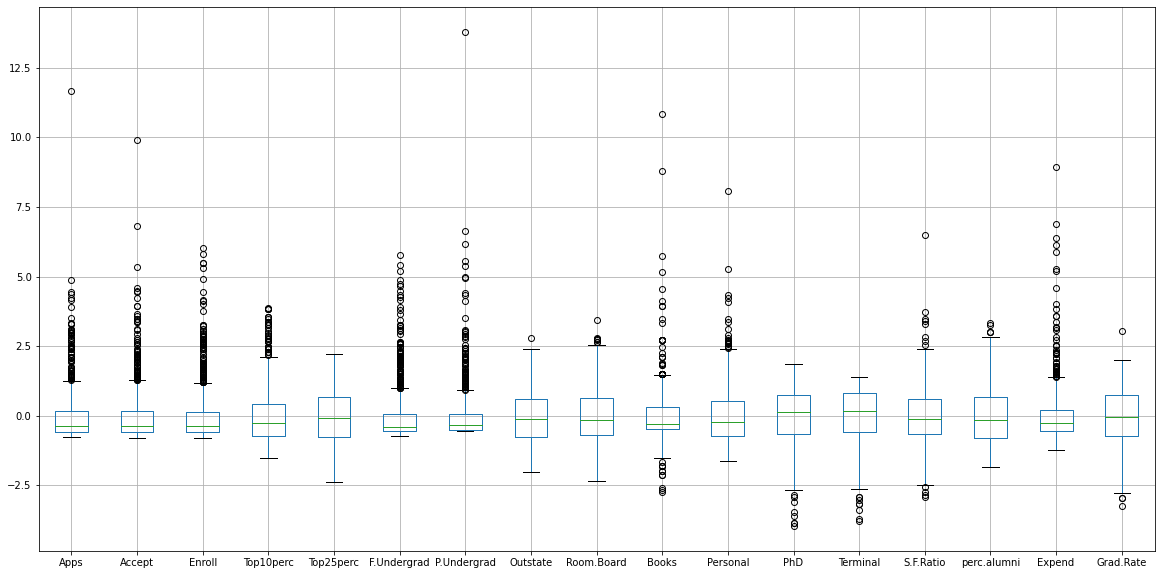

In [70]:
do.boxplot(figsize=(20,10))

<AxesSubplot:>

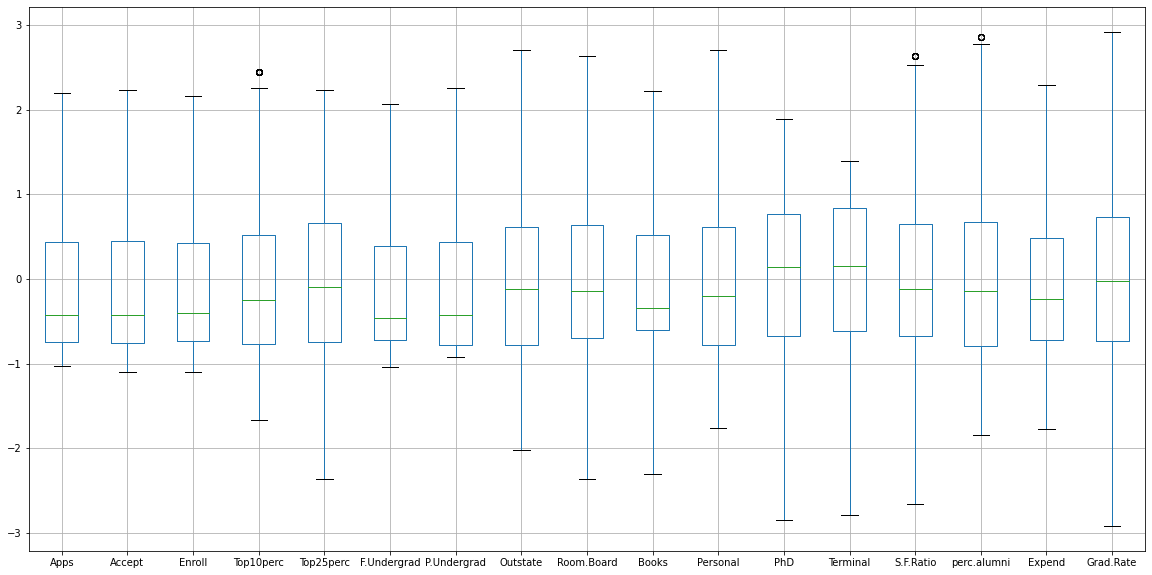

In [71]:
data_df.boxplot(figsize=(20,10))

## Conclusion

The dataset $do$ is with outliers and $data$_$df$ is without outliers. After standardization of both the datasets, we infer that range of $do$ (with outliers) are higher than $data$_$df$ (without outliers). The mean values are also different for both the dataframes. The maximum values of $do$ are varied between 1.3 to 13 while max for $data$_$df$ is between 1.3 to 2.9. minimum values for $do$ is -3 to -0.7 $data$_$df$ is between -2 to -0.9. The idea of standardisation is also to make sure that the data is centred around mean and is not varied to large extent. The boxplots of scaled matrixes without removing outliers and after removing outliers are given above. The graphs indicate that there are many outliers even after scaling. Hence this will make PCA analysis inefficient.
* Z scoe = (x-xbar)/SD


The Z score uses mean. Outliers affect mean and hence removing outliers will give us more close spread data making PCA more efficient. 

## 2.5) Build the covariance matrix and calculate the eigenvalues and the eigenvector.

The covariance matrix when multiplied by a vector will produce a vector that does not change in direction but vary in magnitude and points towards maximum variance. 

cov_matrix x e = $ \lambda$ x e where e is the eigen vector and  $\lambda$  is the eigen value

In [72]:
#calculate covariance

cov_matrix = np.cov(data_df.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00128866e+00  9.56537704e-01  8.98039052e-01  3.21756324e-01
   3.64960691e-01  8.62111140e-01  5.20492952e-01  6.54209711e-02
   1.87717056e-01  2.36441941e-01  2.30243993e-01  4.64521757e-01
   4.35037784e-01  1.26573895e-01 -1.01288006e-01  2.43248206e-01
   1.50997775e-01]
 [ 9.56537704e-01  1.00128866e+00  9.36482483e-01  2.23586208e-01
   2.74033187e-01  8.98189799e-01  5.73428908e-01 -5.00874847e-03
   1.19740419e-01  2.08974091e-01  2.56676290e-01  4.27891234e-01
   4.03929238e-01  1.88748711e-01 -1.65728801e-01  1.62016688e-01
   7.90839722e-02]
 [ 8.98039052e-01  9.36482483e-01  1.00128866e+00  1.71977357e-01
   2.30730728e-01  9.68548601e-01  6.42421828e-01 -1.55856056e-01
  -2.38762560e-02  2.02317274e-01  3.39785395e-01  3.82031198e-01
   3.54835877e-01  2.74622251e-01 -2.23009677e-01  5.42906862e-02
  -2.32810071e-02]
 [ 3.21756324e-01  2.23586208e-01  1.71977357e-01  1.00128866e+00
   9.15052977e-01  1.11358019e-01 -1.80240778e-01  5.62884044e-

In [73]:
# Step 2- Get eigen values and eigen vector

eig_vals, eig_vecs = np.linalg.eig(cov_matrix.T)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)


Eigen Vectors 
%s [[-2.62171542e-01  3.14136258e-01 -8.10177245e-02  9.87761685e-02
   2.19898081e-01 -2.18800617e-03  2.83715076e-02  8.99498102e-02
  -1.30566998e-01  1.56464458e-01  8.62132843e-02 -1.82169814e-01
   5.99137640e-01 -8.99775288e-02 -8.88697944e-02  5.49428396e-01
   5.41453698e-03]
 [-2.30562461e-01  3.44623583e-01 -1.07658626e-01  1.18140437e-01
   1.89634940e-01  1.65212882e-02  1.29584896e-02  1.37606312e-01
  -1.42275847e-01  1.49209799e-01  4.25899061e-02  3.91041719e-01
  -6.61496927e-01 -1.58861886e-01 -4.37945938e-02  2.91572312e-01
   1.44582845e-02]
 [-1.89276397e-01  3.82813322e-01 -8.55296892e-02  9.30717094e-03
   1.62314818e-01  6.80794143e-02  1.52403625e-02  1.44216938e-01
  -5.08712481e-02  6.48997860e-02  4.38408622e-02 -7.16684935e-01
  -2.33235272e-01  3.53988202e-02  6.19241658e-02 -4.17001280e-01
  -4.97908902e-02]
 [-3.38874521e-01 -9.93191661e-02  7.88293849e-02 -3.69115031e-01
   1.57211016e-01  8.88656824e-02  2.57455284e-01 -2.89538833e-01
 

## 2.6) Write the explicit form of the first PC (in terms of Eigen Vectors).

In [74]:
data_df.columns

Index(['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad',
       'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD',
       'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate'],
      dtype='object')

## Expression:

* 2.62171542e-01 x Apps +
* 2.30562461e-01 x Accept + 
* 1.89276397e-01 x Enroll + 
* 3.38874521e-01 x Top10perc + 
* 3.34690532e-01 x Top25perc +
* 1.63293010e-01 x F.Undergrad + 
* 2.24797091e-02 x P.Undergrad + 
* 2.83547285e-01 x Outstate + 
* 2.44186588e-01 x Room.Board + 
* 9.67082754e-02 x Books +
* -3.52299594e-02 x Personal +
* 3.26410696e-01 x PhD +  
* 3.23115980e-01 x Terminal + 
* -1.63151642e-01 x S.F.Ratio +
* 1.86610828e-01 x perc.alumni + 
* 3.28955847e-01 x Expend + 
* 2.38822447e-01 x Grad.Rate 

## OR
* 2.62171542e-01 x -0.376493 +
* 2.30562461e-01 x -0.337830 + 
* 1.89276397e-01 x 0.106380 + 
* 3.38874521e-01 x -0.246780 + 
* 3.34690532e-01 x -0.191827 +
* 1.63293010e-01 x -0.018769 + 
* 2.24797091e-02 x -0.166083 + 
* 2.83547285e-01 x -0.746480 + 
* 2.44186588e-01 x -0.968324 + 
* 9.67082754e-02 x -0.776567 +
* -3.52299594e-02 x 1.438500 +
* 3.26410696e-01 x -0.174045 +  
* 3.23115980e-01 x -0.123239 + 
* -1.63151642e-01 x 1.070602 +
* 1.86610828e-01 x -0.870466 + 
* 3.28955847e-01 x -0.630916 + 
* 2.38822447e-01 x -0.319205 
																

## 2.7) Discuss the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?Perform PCA and export the data of the Principal Component scores into a data frame.

In [75]:
from sklearn.decomposition import PCA
pca = PCA(n_components=17)
data_reduced = pca.fit_transform(data_df)
data_reduced.transpose()

array([[-1.60249937e+00, -1.80467545e+00, -1.60828257e+00, ...,
        -5.76882673e-01,  6.57095200e+00, -4.77393067e-01],
       [ 9.93683013e-01, -7.04149922e-02, -1.38279212e+00, ...,
         1.77984611e-02, -1.18493014e+00,  1.04394672e+00],
       [ 3.00447636e-02,  2.12212752e+00, -5.01512552e-01, ...,
         3.22160336e-01,  1.32596561e+00, -1.42543835e+00],
       ...,
       [ 3.09482851e-03, -3.24329699e-01,  7.30303781e-02, ...,
        -1.62407776e-01, -9.64378943e-02, -5.59570376e-03],
       [-3.06898585e-02, -1.63392355e-01, -2.36336429e-02, ...,
        -2.70575811e-01,  9.57356063e-01, -6.78126913e-02],
       [-1.47130758e-01,  1.92958540e-01,  4.32362016e-03, ...,
         3.87433636e-02, -4.55356845e-01, -4.89303358e-02]])

In [76]:
pca.components_

array([[ 2.62171542e-01,  2.30562461e-01,  1.89276397e-01,
         3.38874521e-01,  3.34690532e-01,  1.63293010e-01,
         2.24797091e-02,  2.83547285e-01,  2.44186588e-01,
         9.67082754e-02, -3.52299594e-02,  3.26410696e-01,
         3.23115980e-01, -1.63151642e-01,  1.86610828e-01,
         3.28955847e-01,  2.38822447e-01],
       [ 3.14136258e-01,  3.44623583e-01,  3.82813322e-01,
        -9.93191661e-02, -5.95055011e-02,  3.98636372e-01,
         3.57550046e-01, -2.51863617e-01, -1.31909124e-01,
         9.39739472e-02,  2.32439594e-01,  5.51390195e-02,
         4.30332048e-02,  2.59804556e-01, -2.57092552e-01,
        -1.60008951e-01, -1.67523664e-01],
       [-8.10177245e-02, -1.07658626e-01, -8.55296892e-02,
         7.88293849e-02,  5.07938247e-02, -7.37077827e-02,
        -4.03568700e-02, -1.49394795e-02,  2.11379165e-02,
         6.97121128e-01,  5.30972806e-01, -8.11134044e-02,
        -5.89785929e-02, -2.74150657e-01, -1.03715887e-01,
         1.84205687e-01, -2.4

In [77]:
pca.explained_variance_ratio_

array([0.33266084, 0.28755345, 0.06617164, 0.05898144, 0.05123893,
       0.04498639, 0.03436243, 0.03198847, 0.02488108, 0.02238396,
       0.01451157, 0.00865143, 0.00789247, 0.00580627, 0.00438788,
       0.00222619, 0.00131558])

In [78]:
#cumulative sum of variance explained with 17 features
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var 

array([ 33.3,  62.1,  68.7,  74.6,  79.7,  84.2,  87.6,  90.8,  93.3,
        95.5,  97. ,  97.9,  98.7,  99.3,  99.7,  99.9, 100. ])

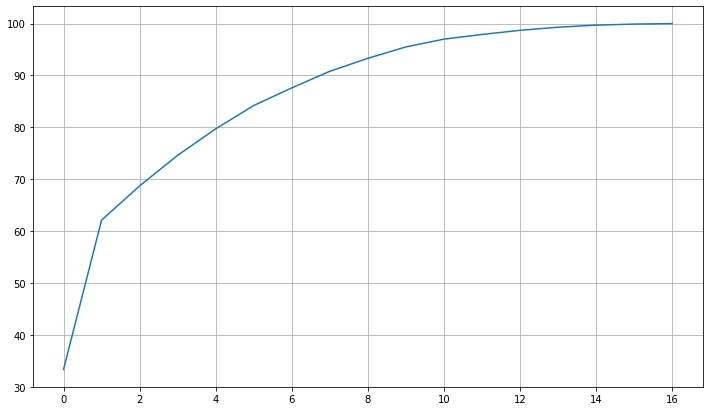

In [79]:
plt.figure(figsize=(12,7))
plt.plot(var)
plt.grid()
plt.show()


In [80]:
df_comp = pd.DataFrame(pca.components_,columns=list(data_df))
df_comp.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0  0.262172  0.230562  0.189276   0.338875   0.334691     0.163293   
1  0.314136  0.344624  0.382813  -0.099319  -0.059506     0.398636   
2 -0.081018 -0.107659 -0.085530   0.078829   0.050794    -0.073708   
3  0.098776  0.118140  0.009307  -0.369115  -0.416824     0.013950   
4  0.219898  0.189635  0.162315   0.157211   0.144449     0.102728   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0     0.022480  0.283547    0.244187  0.096708 -0.035230  0.326411  0.323116   
1     0.357550 -0.251864   -0.131909  0.093974  0.232440  0.055139  0.043033   
2    -0.040357 -0.014939    0.021138  0.697121  0.530973 -0.081113 -0.058979   
3     0.225351  0.262975    0.580894 -0.036156 -0.114983 -0.147261 -0.089008   
4    -0.095679  0.037275   -0.069108  0.035406 -0.000475 -0.550787 -0.590407   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0  -0.163152     0.186611  0.328956   0.238822  
1   0.259805    -0.257093 -0.160009  -0.167524  
2  -0.274151    -0.103716  0.184206  -0.245336  
3  -0.259486    -0.223982  0.213756  -0.036192  
4  -0.142843     0.128216 -0.022424   0.356843

<AxesSubplot:>

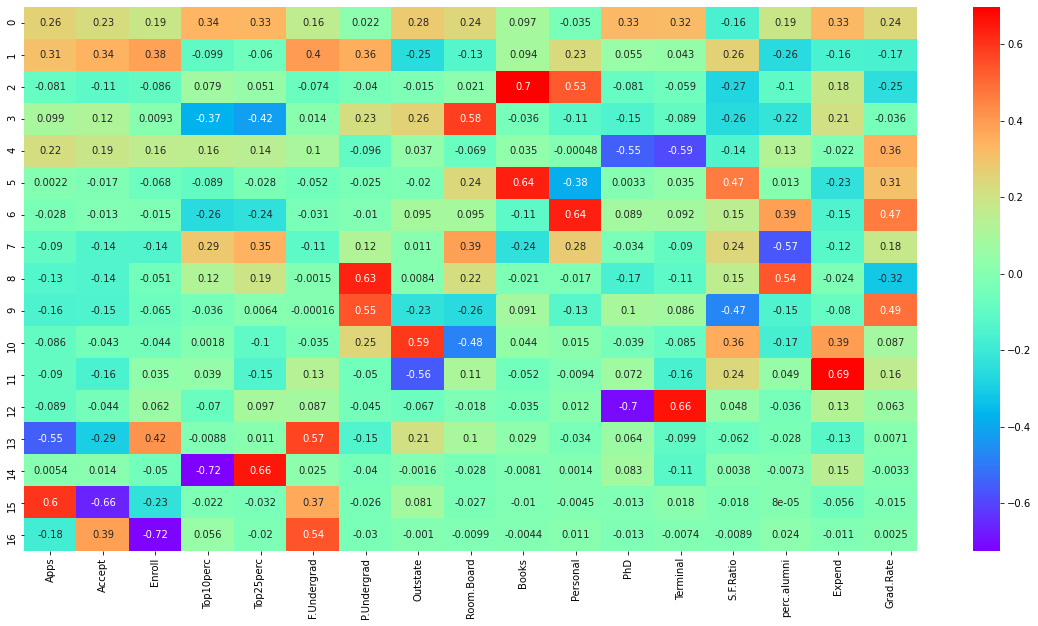

In [81]:
plt.figure(figsize=(20,10))
sns.heatmap(df_comp,cmap='rainbow',annot=True)

PCA components are coefficients or the eigen vectors which will help us prioritse the variables. They are the weights that are used to multiply with the data points of each of the column variables to calculation the principle component as obtained in data_reduced. The cumilative eigen values represent the collective % of variance than each of the Principle component carry. The first 8 components accounts for upto 90.8% of variances. Hence we could pick upto 8 Principle components if we are looking at covering a 90% of variance within the dataset.

## 2.8) Mention the business implication of using the Principal Component Analysis for this case study. [Hint: Write Interpretations of the Principal Components Obtained]

In [82]:
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
data_reduced = pca.fit_transform(data_df)
data_reduced.transpose()

array([[-1.60249937e+00, -1.80467545e+00, -1.60828257e+00, ...,
        -5.76882673e-01,  6.57095200e+00, -4.77393067e-01],
       [ 9.93683013e-01, -7.04149922e-02, -1.38279212e+00, ...,
         1.77984611e-02, -1.18493014e+00,  1.04394672e+00],
       [ 3.00447636e-02,  2.12212752e+00, -5.01512552e-01, ...,
         3.22160336e-01,  1.32596561e+00, -1.42543835e+00],
       ...,
       [-6.97475824e-01,  9.94858508e-01, -1.02623665e+00, ...,
         5.04042792e-01, -8.22745604e-01,  1.05180970e+00],
       [ 7.10616255e-01, -3.96083169e-01, -1.65310575e-01, ...,
        -1.45835209e+00,  1.20132639e+00,  1.07308672e+00],
       [ 8.95166868e-01,  2.59664018e-01, -4.08817874e-01, ...,
        -2.89146665e-01,  5.73988519e-03,  6.05416581e-01]])

In [83]:
do1=pd.DataFrame(data_reduced)
do1

0         1         2         3         4         5         6  \
0   -1.602499  0.993683  0.030045 -1.008422 -0.366886 -0.697476  0.710616   
1   -1.804675 -0.070415  2.122128  3.138941  2.453212  0.994859 -0.396083   
2   -1.608283 -1.382792 -0.501513 -0.036373  0.765997 -1.026237 -0.165311   
3    2.803644 -3.367395  0.367768 -0.632914 -1.192601 -1.457080 -1.199862   
4   -2.200868 -0.099348  3.122523  0.657707 -1.828044  0.140915 -1.963228   
..        ...       ...       ...       ...       ...       ...       ...   
772 -3.395392  1.995628 -0.744776  0.800067 -0.342732  0.573074 -0.171927   
773  0.319750 -0.314944  0.013597  0.653856  0.462527  0.741736  0.778473   
774 -0.576883  0.017798  0.322160 -0.587259  0.175225  0.504043 -1.458352   
775  6.570952 -1.184930  1.325966  0.077707  1.368517 -0.822746  1.201326   
776 -0.477393  1.043947 -1.425438 -1.300274  0.720918  1.051810  1.073087   

            7  
0    0.895167  
1    0.259664  
2   -0.408818  
3    0.357938  
4   -0.151893  
..        ...  
772  0.098249  
773 -0.271679  
774 -0.289147  
775  0.005740  
776  0.605417  

[777 rows x 8 columns]

In [84]:
do12=pd.DataFrame(data["Names"])
do12

Names
0      Abilene Christian University
1                Adelphi University
2                    Adrian College
3               Agnes Scott College
4         Alaska Pacific University
..                              ...
772         Worcester State College
773               Xavier University
774  Xavier University of Louisiana
775                 Yale University
776    York College of Pennsylvania

[777 rows x 1 columns]

In [85]:
data_PCA=pd.concat([do12,do1], axis=1)
data_PCA

Names         0         1         2         3  \
0      Abilene Christian University -1.602499  0.993683  0.030045 -1.008422   
1                Adelphi University -1.804675 -0.070415  2.122128  3.138941   
2                    Adrian College -1.608283 -1.382792 -0.501513 -0.036373   
3               Agnes Scott College  2.803644 -3.367395  0.367768 -0.632914   
4         Alaska Pacific University -2.200868 -0.099348  3.122523  0.657707   
..                              ...       ...       ...       ...       ...   
772         Worcester State College -3.395392  1.995628 -0.744776  0.800067   
773               Xavier University  0.319750 -0.314944  0.013597  0.653856   
774  Xavier University of Louisiana -0.576883  0.017798  0.322160 -0.587259   
775                 Yale University  6.570952 -1.184930  1.325966  0.077707   
776    York College of Pennsylvania -0.477393  1.043947 -1.425438 -1.300274   

            4         5         6         7  
0   -0.366886 -0.697476  0.710616  0.895167  
1    2.453212  0.994859 -0.396083  0.259664  
2    0.765997 -1.026237 -0.165311 -0.408818  
3   -1.192601 -1.457080 -1.199862  0.357938  
4   -1.828044  0.140915 -1.963228 -0.151893  
..        ...       ...       ...       ...  
772 -0.342732  0.573074 -0.171927  0.098249  
773  0.462527  0.741736  0.778473 -0.271679  
774  0.175225  0.504043 -1.458352 -0.289147  
775  1.368517 -0.822746  1.201326  0.005740  
776  0.720918  1.051810  1.073087  0.605417  

[777 rows x 9 columns]

In [86]:
pca.components_

array([[ 2.62171542e-01,  2.30562461e-01,  1.89276397e-01,
         3.38874521e-01,  3.34690532e-01,  1.63293010e-01,
         2.24797091e-02,  2.83547285e-01,  2.44186588e-01,
         9.67082754e-02, -3.52299594e-02,  3.26410696e-01,
         3.23115980e-01, -1.63151642e-01,  1.86610828e-01,
         3.28955847e-01,  2.38822447e-01],
       [ 3.14136258e-01,  3.44623583e-01,  3.82813322e-01,
        -9.93191661e-02, -5.95055011e-02,  3.98636372e-01,
         3.57550046e-01, -2.51863617e-01, -1.31909124e-01,
         9.39739472e-02,  2.32439594e-01,  5.51390195e-02,
         4.30332048e-02,  2.59804556e-01, -2.57092552e-01,
        -1.60008951e-01, -1.67523664e-01],
       [-8.10177245e-02, -1.07658626e-01, -8.55296892e-02,
         7.88293849e-02,  5.07938247e-02, -7.37077827e-02,
        -4.03568700e-02, -1.49394795e-02,  2.11379165e-02,
         6.97121128e-01,  5.30972806e-01, -8.11134044e-02,
        -5.89785929e-02, -2.74150657e-01, -1.03715887e-01,
         1.84205687e-01, -2.4

In [87]:
pca.explained_variance_ratio_

array([0.33266084, 0.28755345, 0.06617164, 0.05898144, 0.05123893,
       0.04498639, 0.03436243, 0.03198847])

In [88]:
#cumulative sum of variance explained with 17 features
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var 

array([33.3, 62.1, 68.7, 74.6, 79.7, 84.2, 87.6, 90.8])

In [89]:
df_comp = pd.DataFrame(pca.components_,columns=list(data_df))
df_comp.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0  0.262172  0.230562  0.189276   0.338875   0.334691     0.163293   
1  0.314136  0.344624  0.382813  -0.099319  -0.059506     0.398636   
2 -0.081018 -0.107659 -0.085530   0.078829   0.050794    -0.073708   
3  0.098776  0.118140  0.009307  -0.369115  -0.416824     0.013950   
4  0.219898  0.189635  0.162315   0.157211   0.144449     0.102728   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0     0.022480  0.283547    0.244187  0.096708 -0.035230  0.326411  0.323116   
1     0.357550 -0.251864   -0.131909  0.093974  0.232440  0.055139  0.043033   
2    -0.040357 -0.014939    0.021138  0.697121  0.530973 -0.081113 -0.058979   
3     0.225351  0.262975    0.580894 -0.036156 -0.114983 -0.147261 -0.089008   
4    -0.095679  0.037275   -0.069108  0.035406 -0.000475 -0.550787 -0.590407   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0  -0.163152     0.186611  0.328956   0.238822  
1   0.259805    -0.257093 -0.160009  -0.167524  
2  -0.274151    -0.103716  0.184206  -0.245336  
3  -0.259486    -0.223982  0.213756  -0.036192  
4  -0.142843     0.128216 -0.022424   0.356843

<AxesSubplot:>

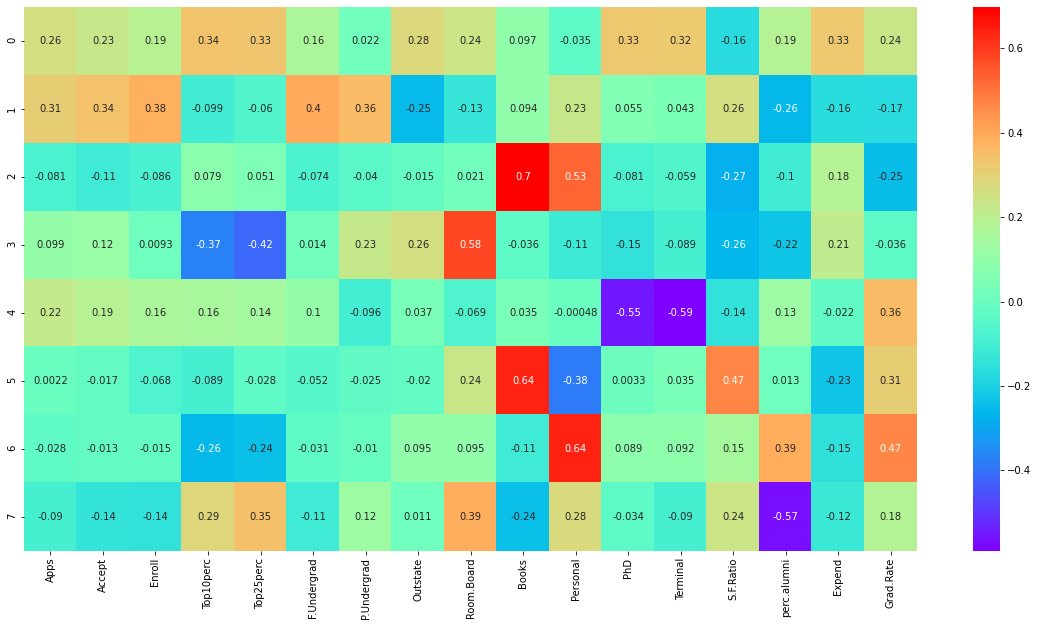

In [90]:
plt.figure(figsize=(20,10))
sns.heatmap(df_comp,cmap='rainbow',annot=True)

## PCA

PCA components are coefficients or the eigen vectors which will help us prioritse the variables. They are the weights that are used to multiply with the data points of each of the column variables to calculation the principle component as obtained in data_reduced. The first 8 components accounts for upto 90% of variances. Hence we could pick upto 8 Principle components if we are looking at covering a 90% of variance within the dataset. Based on the higher range PC components values, We see that PC1 accounts for Full time undergraduates, PC2 accounts forestimated cost of Books for a students, PC3 accounts for Cost of rooms and boards, PC4 accounts for graduation rate , PC5 accounts for estimated cost of Books for a student and Student to Faculty Ratio, PC6 accounts for estimated Personal spendings for a student, PC 7 accounts for Top 25 percentage of students.